In [88]:
import pandas as pd
import numpy as np
import matplotlib as mtl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import os
import folium
import json
from branca.colormap import linear
from folium.plugins import MarkerCluster
from folium.plugins import Fullscreen
from __future__ import print_function
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

pd.options.mode.chained_assignment = None

In [89]:
df = pd.read_csv('Crimedata.csv')
df

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"
5,120125367,01/08/2013,01/08/2013,1400,1,Central,111,110,CRIMINAL HOMICIDE,1243 2000 1813 1814 2002 0416 0400,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,110.0,NaN,NaN,NaN,600 N HILL ST,NaN,"(34.0591, -118.2412)"
6,101105609,01/28/2010,01/27/2010,2230,11,Northeast,1125,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"(34.1211, -118.2048)"
7,101620051,11/11/2010,11/07/2010,1600,16,Foothill,1641,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"(34.241, -118.3987)"
8,101910498,04/07/2010,04/07/2010,1600,19,Mission,1902,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,GLENOAKS,DRELL,"(34.3147, -118.4589)"
9,120908292,03/29/2013,01/15/2013,800,9,Van Nuys,904,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0344 1300,...,NaN,IC,Invest Cont,668.0,NaN,NaN,NaN,7200 SEPULVEDA BL,NaN,"(34.2012, -118.4662)"


In [90]:
df = df[~df['Date Occurred'].str.contains("2010|2011|2012|2013|2014|2015|2016")]
df

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
657502,171013348,07/21/2017,07/20/2017,2000,10,West Valley,1047,330,BURGLARY FROM VEHICLE,1609 0344,...,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,00,NaN,NaN
734451,171013326,07/21/2017,07/21/2017,1000,10,West Valley,1008,330,BURGLARY FROM VEHICLE,1609 0344 0377,...,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,00,NaN,NaN
1308923,170209449,04/22/2017,04/21/2017,1930,2,Rampart,201,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,ALEXANDRIA,ROMAINE,"(34.0886, -118.2979)"
1382661,170206243,02/14/2017,02/11/2017,1700,2,Rampart,275,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,OLYMPIC,WESTLAKE,"(34.0512, -118.2787)"
1383229,170311599,04/25/2017,04/25/2017,745,3,Southwest,325,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VERMONT,ADAMS,"(34.0328, -118.2915)"
1383510,170408264,04/07/2017,04/07/2017,1,4,Hollenbeck,421,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,ALHAMBRA,VALLEY,"(34.0676, -118.2202)"
1383605,170508584,04/10/2017,04/08/2017,730,5,Harbor,566,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,10TH,CENTURY,"(33.7347, -118.2842)"
1383932,170706824,03/06/2017,03/06/2017,2300,7,Wilshire,727,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,LA BREA,BEVERLY,"(34.0762, -118.3441)"
1384619,170114037,05/12/2017,05/11/2017,1700,1,Central,133,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,3RD,BROADWAY,"(34.051, -118.248)"
1384681,170116244,06/07/2017,06/06/2017,2030,1,Central,138,330,BURGLARY FROM VEHICLE,0344,...,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,3RD,WALL,"(34.048, -118.2438)"


In [91]:
df['Victim Sex'].value_counts()

M    196753
F    176084
X     20444
H        18
N        14
Name: Victim Sex, dtype: int64

In [92]:
df['Victim Sex'].fillna("U", inplace=True)

df = df[~df['Victim Sex'].str.contains("X|H|N")]

In [93]:
df['Victim Sex'].value_counts()

M    196753
F    176084
U     42599
Name: Victim Sex, dtype: int64

In [94]:
df['Victim Age'].isnull().sum()

17714

In [95]:
df = df[np.isfinite(df['Victim Age'])]

In [96]:
df['Victim Age'].isnull().sum()

0

In [97]:
df[df['Victim Age'] < 0]['Victim Age']

Series([], Name: Victim Age, dtype: float64)

In [98]:
print (df[df['Time Occurred'] < 100])

         DR Number Date Reported Date Occurred  Time Occurred  Area ID  \
1383510  170408264    04/07/2017    04/07/2017              1        4   
1385100  170208178    03/26/2017    03/26/2017              1        2   
1421777  170100001    03/16/2017    03/16/2017             30        7   
1421783  170100513    01/07/2017    01/07/2017             45        1   
1421806  170100557    01/22/2017    01/22/2017             15        1   
1421831  170100606    02/15/2017    02/15/2017             15        1   
1421839  170100629    02/22/2017    02/22/2017             30        1   
1421872  170100704    03/25/2017    03/25/2017             55        1   
1421886  170100732    04/01/2017    04/01/2017             38        1   
1421888  170100736    04/02/2017    04/01/2017             15        1   
1421910  170100779    04/15/2017    04/15/2017             40        1   
1421952  170100837    01/16/2017    01/16/2017              5        1   
1421990  170100975    06/30/2017    06

In [99]:
df['Time Occurred'] = df['Time Occurred'].astype(str)
df['Time Occurred'] = df['Time Occurred'].apply(lambda x: x.zfill(4))
df['Time Occurred']

657502     2000
734451     1000
1308923    1930
1382661    1700
1383229    0745
1383510    0001
1383605    0730
1383932    2300
1384619    1700
1384681    2030
1384950    1000
1385019    0300
1385100    0001
1385132    2230
1385457    2200
1385780    1800
1385864    0710
1385903    2230
1385977    0730
1386115    1200
1386123    1030
1386137    2000
1386447    1800
1386511    1900
1388036    1200
1388564    1500
1418607    1900
1419969    1850
1420862    0820
1420917    2300
           ... 
1872138    2220
1872139    1830
1872140    0001
1872141    0400
1872142    1500
1872143    2230
1872144    2000
1872145    0600
1872146    0630
1872147    1330
1872148    2240
1872149    1000
1872150    2057
1872151    0800
1872152    0920
1872153    1530
1872154    0700
1872155    1730
1872156    2035
1872157    1916
1872158    1108
1872159    2320
1872160    1810
1872161    2200
1872162    1045
1872163    1800
1872164    0900
1872165    0800
1872167    1200
1872168    0800
Name: Time Occurred, Len

In [100]:
df['Date-Time Occured'] = df["Date Occurred"].map(str) + " " + df["Time Occurred"].map(str)
df['Date-Time Occured']

657502     07/20/2017 2000
734451     07/21/2017 1000
1308923    04/21/2017 1930
1382661    02/11/2017 1700
1383229    04/25/2017 0745
1383510    04/07/2017 0001
1383605    04/08/2017 0730
1383932    03/06/2017 2300
1384619    05/11/2017 1700
1384681    06/06/2017 2030
1384950    01/26/2017 1000
1385019    02/10/2017 0300
1385100    03/26/2017 0001
1385132    03/20/2017 2230
1385457    04/07/2017 2200
1385780    06/11/2017 1800
1385864    05/05/2017 0710
1385903    05/18/2017 2230
1385977    06/13/2017 0730
1386115    04/21/2017 1200
1386123    06/16/2017 1030
1386137    05/18/2017 2000
1386447    06/26/2017 1800
1386511    06/27/2017 1900
1388036    04/22/2017 1200
1388564    03/17/2017 1500
1418607    01/15/2017 1900
1419969    01/05/2017 1850
1420862    01/16/2017 0820
1420917    01/15/2017 2300
                ...       
1872138    11/28/2018 2220
1872139    11/18/2018 1830
1872140    06/01/2018 0001
1872141    11/26/2018 0400
1872142    11/27/2018 1500
1872143    11/28/2018 2230
1

In [101]:
df['Date-Time Occured'] = pd.to_datetime(df['Date-Time Occured'])
df['Date-Time Occured']

657502    2017-07-20 20:00:00
734451    2017-07-21 10:00:00
1308923   2017-04-21 19:30:00
1382661   2017-02-11 17:00:00
1383229   2017-04-25 07:45:00
1383510   2017-04-07 00:01:00
1383605   2017-04-08 07:30:00
1383932   2017-03-06 23:00:00
1384619   2017-05-11 17:00:00
1384681   2017-06-06 20:30:00
1384950   2017-01-26 10:00:00
1385019   2017-02-10 03:00:00
1385100   2017-03-26 00:01:00
1385132   2017-03-20 22:30:00
1385457   2017-04-07 22:00:00
1385780   2017-06-11 18:00:00
1385864   2017-05-05 07:10:00
1385903   2017-05-18 22:30:00
1385977   2017-06-13 07:30:00
1386115   2017-04-21 12:00:00
1386123   2017-06-16 10:30:00
1386137   2017-05-18 20:00:00
1386447   2017-06-26 18:00:00
1386511   2017-06-27 19:00:00
1388036   2017-04-22 12:00:00
1388564   2017-03-17 15:00:00
1418607   2017-01-15 19:00:00
1419969   2017-01-05 18:50:00
1420862   2017-01-16 08:20:00
1420917   2017-01-15 23:00:00
                  ...        
1872138   2018-11-28 22:20:00
1872139   2018-11-18 18:30:00
1872140   

In [102]:
df['Date Reported'] = pd.to_datetime(df['Date Reported'])

In [103]:
df

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Date-Time Occured
657502,171013348,2017-07-21,07/20/2017,2000,10,West Valley,1047,330,BURGLARY FROM VEHICLE,1609 0344,...,IC,Invest Cont,330.0,NaN,NaN,NaN,00,NaN,NaN,2017-07-20 20:00:00
734451,171013326,2017-07-21,07/21/2017,1000,10,West Valley,1008,330,BURGLARY FROM VEHICLE,1609 0344 0377,...,IC,Invest Cont,330.0,NaN,NaN,NaN,00,NaN,NaN,2017-07-21 10:00:00
1308923,170209449,2017-04-22,04/21/2017,1930,2,Rampart,201,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,ALEXANDRIA,ROMAINE,"(34.0886, -118.2979)",2017-04-21 19:30:00
1382661,170206243,2017-02-14,02/11/2017,1700,2,Rampart,275,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,OLYMPIC,WESTLAKE,"(34.0512, -118.2787)",2017-02-11 17:00:00
1383229,170311599,2017-04-25,04/25/2017,0745,3,Southwest,325,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,VERMONT,ADAMS,"(34.0328, -118.2915)",2017-04-25 07:45:00
1383510,170408264,2017-04-07,04/07/2017,0001,4,Hollenbeck,421,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,ALHAMBRA,VALLEY,"(34.0676, -118.2202)",2017-04-07 00:01:00
1383605,170508584,2017-04-10,04/08/2017,0730,5,Harbor,566,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,10TH,CENTURY,"(33.7347, -118.2842)",2017-04-08 07:30:00
1383932,170706824,2017-03-06,03/06/2017,2300,7,Wilshire,727,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,LA BREA,BEVERLY,"(34.0762, -118.3441)",2017-03-06 23:00:00
1384619,170114037,2017-05-12,05/11/2017,1700,1,Central,133,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,3RD,BROADWAY,"(34.051, -118.248)",2017-05-11 17:00:00
1384681,170116244,2017-06-07,06/06/2017,2030,1,Central,138,330,BURGLARY FROM VEHICLE,0344,...,IC,Invest Cont,330.0,NaN,NaN,NaN,3RD,WALL,"(34.048, -118.2438)",2017-06-06 20:30:00


In [104]:
df['Location '].isnull().sum()

9

In [105]:
df['Location '].fillna("(0, 0)", inplace=True)

In [106]:
df['Location '].isnull().sum()

0

In [107]:
df[df['Location '] == "(0, 0)"]

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Date-Time Occured
657502,171013348,2017-07-21,07/20/2017,2000,10,West Valley,1047,330,BURGLARY FROM VEHICLE,1609 0344,...,IC,Invest Cont,330.0,NaN,NaN,NaN,00,NaN,"(0, 0)",2017-07-20 20:00:00
734451,171013326,2017-07-21,07/21/2017,1000,10,West Valley,1008,330,BURGLARY FROM VEHICLE,1609 0344 0377,...,IC,Invest Cont,330.0,NaN,NaN,NaN,00,NaN,"(0, 0)",2017-07-21 10:00:00
1421863,170100685,2017-03-17,03/17/2017,0830,1,Central,157,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,AO,Adult Other,740.0,NaN,NaN,NaN,600 CROCKER ST,NaN,"(0, 0)",2017-03-17 08:30:00
1421868,170100696,2017-03-20,03/20/2017,1520,1,Central,143,761,BRANDISH WEAPON,1202 0334 0432 0601 1402,...,IC,Invest Cont,761.0,998.0,NaN,NaN,3RD ST,HILL ST,"(0, 0)",2017-03-20 15:20:00
1421933,170100824,2017-05-02,05/02/2017,1830,1,Central,158,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 2004 0416 0400,...,AO,Adult Other,626.0,NaN,NaN,NaN,INDUSTRIAL,KOHLER,"(0, 0)",2017-05-02 18:30:00
1421962,170100891,2017-05-26,05/26/2017,1430,1,Central,162,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 1402,...,IC,Invest Cont,230.0,998.0,NaN,NaN,7TH ST,FLOWER ST,"(0, 0)",2017-05-26 14:30:00
1423773,170108754,2017-03-14,03/14/2017,1410,1,Central,156,654,"CREDIT CARDS, FRAUD USE ($950 & UNDER",1402 1902,...,AO,Adult Other,654.0,998.0,NaN,NaN,5TH ST,SAN PEDRO ST,"(0, 0)",2017-03-14 14:10:00
1423774,170108755,2017-03-14,03/10/2017,2000,1,Central,182,624,BATTERY - SIMPLE ASSAULT,1251 1259 0416 1313,...,IC,Invest Cont,624.0,NaN,NaN,NaN,PICO BL,FLOWER ST,"(0, 0)",2017-03-10 20:00:00
1423775,170108759,2017-03-14,03/05/2017,0835,1,Central,161,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325,...,IC,Invest Cont,442.0,NaN,NaN,NaN,700 S FIGUEROA ST,NaN,"(0, 0)",2017-03-05 08:35:00
1423792,170108756,2017-03-14,03/13/2017,1730,1,Central,131,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,IC,Invest Cont,740.0,NaN,NaN,NaN,100 S FIGUEROA ST,NaN,"(0, 0)",2017-03-13 17:30:00


In [108]:
df = df[~df['Location '].isin(["(0, 0)"])]
df[df['Location '] == "(0, 0)"]

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Date-Time Occured


In [109]:
df['Location '] = df['Location '].map(lambda x: x.strip('()'))
df['Location ']

1308923    34.0886, -118.2979
1382661    34.0512, -118.2787
1383229    34.0328, -118.2915
1383510    34.0676, -118.2202
1383605    33.7347, -118.2842
1383932    34.0762, -118.3441
1384619      34.051, -118.248
1384681     34.048, -118.2438
1384950     34.021, -118.2123
1385019    34.0699, -118.2595
1385100     34.0644, -118.263
1385132    34.0225, -118.2156
1385457    34.0544, -118.2767
1385780    34.0797, -118.2183
1385864     34.023, -118.2793
1385903    34.0428, -118.2532
1385977     34.0188, -118.201
1386115    34.0806, -118.2176
1386123    34.0268, -118.2075
1386137    34.0203, -118.1946
1386447    33.7827, -118.2667
1386511    33.7225, -118.3034
1388036    34.0697, -118.2779
1388564    34.0457, -118.2878
1418607    34.1649, -118.4475
1419969      34.0451, -118.27
1420862    34.0565, -118.2411
1420917     34.046, -118.2417
1421124    34.0504, -118.2409
1421202    34.0445, -118.2558
                  ...        
1872138    34.2182, -118.5798
1872139    34.1883, -118.6274
1872140   

In [110]:
app = df['Location '].str.split(",", expand = True)
df['Lat'] = app.loc[:,0]
df['Lon'] = app.loc[:,1]
del df['Location ']
df

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Date-Time Occured,Lat,Lon
1308923,170209449,2017-04-22,04/21/2017,1930,2,Rampart,201,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,ALEXANDRIA,ROMAINE,2017-04-21 19:30:00,34.0886,-118.2979
1382661,170206243,2017-02-14,02/11/2017,1700,2,Rampart,275,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,OLYMPIC,WESTLAKE,2017-02-11 17:00:00,34.0512,-118.2787
1383229,170311599,2017-04-25,04/25/2017,0745,3,Southwest,325,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,VERMONT,ADAMS,2017-04-25 07:45:00,34.0328,-118.2915
1383510,170408264,2017-04-07,04/07/2017,0001,4,Hollenbeck,421,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,ALHAMBRA,VALLEY,2017-04-07 00:01:00,34.0676,-118.2202
1383605,170508584,2017-04-10,04/08/2017,0730,5,Harbor,566,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,10TH,CENTURY,2017-04-08 07:30:00,33.7347,-118.2842
1383932,170706824,2017-03-06,03/06/2017,2300,7,Wilshire,727,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,LA BREA,BEVERLY,2017-03-06 23:00:00,34.0762,-118.3441
1384619,170114037,2017-05-12,05/11/2017,1700,1,Central,133,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,3RD,BROADWAY,2017-05-11 17:00:00,34.051,-118.248
1384681,170116244,2017-06-07,06/06/2017,2030,1,Central,138,330,BURGLARY FROM VEHICLE,0344,...,Invest Cont,330.0,NaN,NaN,NaN,3RD,WALL,2017-06-06 20:30:00,34.048,-118.2438
1384950,170405181,2017-01-29,01/26/2017,1000,4,Hollenbeck,497,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,OLYMPIC,DACOTAH,2017-01-26 10:00:00,34.021,-118.2123
1385019,170206004,2017-02-10,02/10/2017,0300,2,Rampart,218,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,BELLEVUE,KENSINGTON,2017-02-10 03:00:00,34.0699,-118.2595


In [111]:
df['Victim Descent'].isnull().sum()

42131

In [112]:
df['Victim Descent'].fillna("X", inplace=True)

In [113]:
df['Victim Descent'].isnull().sum()

0

In [114]:
df2017 = df[df['Date Occurred'].str.contains("2017")]
df2018 = df[df['Date Occurred'].str.contains("2018")]

In [115]:
del df['Date Occurred']
del df['Time Occurred']

del df2017['Date Occurred']
del df2017['Time Occurred']
del df2018['Date Occurred']
del df2018['Time Occurred']

In [116]:
len(df2017.index)

207054

In [117]:
len(df2018.index)

185175

In [118]:
maleNum = (df2017['Victim Sex'].value_counts())['M']
femaleNum = (df2017['Victim Sex'].value_counts())['F']
unknownNum = (df2017['Victim Sex'].value_counts())['U']
df2017Rows = len(df2017.index)
percMale = round((maleNum/df2017Rows)*100,2)
percFemale = round((femaleNum/df2017Rows)*100,2)
percUnknown = round((unknownNum/df2017Rows)*100,2)
print("Percentage of male victims in 2017: ",percMale,"%")
print("Percentage of female victims in 2017: ",percFemale,"%")
print("Percentage of unknown victims in 2017: ",percUnknown,"%")

Percentage of male victims in 2017:  45.55 %
Percentage of female victims in 2017:  43.36 %
Percentage of unknown victims in 2017:  11.09 %


In [119]:
maleNum = (df2018['Victim Sex'].value_counts())['M']
femaleNum = (df2018['Victim Sex'].value_counts())['F']
unknownNum = (df2018['Victim Sex'].value_counts())['U']
df2018Rows = len(df2018.index)
percMale = round((maleNum/df2018Rows)*100,2)
percFemale = round((femaleNum/df2018Rows)*100,2)
percUnknown = round((unknownNum/df2018Rows)*100,2)
print("Percentage of male victims in 2018: ",percMale,"%")
print("Percentage of female victims in 2018: ",percFemale,"%")
print("Percentage of unknown victims in 2018: ",percUnknown,"%")

Percentage of male victims in 2018:  46.01 %
Percentage of female victims in 2018:  43.64 %
Percentage of unknown victims in 2018:  10.35 %


In [120]:
ages = df2017['Victim Age'].value_counts().index.values
ages.sort()
ages

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
       36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48.,
       49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61.,
       62., 63., 64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74.,
       75., 76., 77., 78., 79., 80., 81., 82., 83., 84., 85., 86., 87.,
       88., 89., 90., 91., 92., 93., 94., 95., 96., 97., 98., 99.])

In [121]:
countsAges = df2017['Victim Age'].value_counts()
for age in ages:
    ageNum = countsAges[age]
    percAge = round((ageNum/df2017Rows)*100,2)
    print("Percentage of victim's age ",age," in 2017 are: ",percAge,"%")

Percentage of victim's age  10.0  in 2017 are:  0.14 %
Percentage of victim's age  11.0  in 2017 are:  0.2 %
Percentage of victim's age  12.0  in 2017 are:  0.31 %
Percentage of victim's age  13.0  in 2017 are:  0.38 %
Percentage of victim's age  14.0  in 2017 are:  0.45 %
Percentage of victim's age  15.0  in 2017 are:  0.54 %
Percentage of victim's age  16.0  in 2017 are:  13.62 %
Percentage of victim's age  17.0  in 2017 are:  0.78 %
Percentage of victim's age  18.0  in 2017 are:  1.0 %
Percentage of victim's age  19.0  in 2017 are:  1.28 %
Percentage of victim's age  20.0  in 2017 are:  1.56 %
Percentage of victim's age  21.0  in 2017 are:  1.72 %
Percentage of victim's age  22.0  in 2017 are:  1.87 %
Percentage of victim's age  23.0  in 2017 are:  2.09 %
Percentage of victim's age  24.0  in 2017 are:  2.32 %
Percentage of victim's age  25.0  in 2017 are:  2.43 %
Percentage of victim's age  26.0  in 2017 are:  2.45 %
Percentage of victim's age  27.0  in 2017 are:  2.52 %
Percentage 

In [122]:
ages = df2018['Victim Age'].value_counts().index.values
ages.sort()
ages

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
       36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48.,
       49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61.,
       62., 63., 64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74.,
       75., 76., 77., 78., 79., 80., 81., 82., 83., 84., 85., 86., 87.,
       88., 89., 90., 91., 92., 93., 94., 95., 96., 97., 98., 99.])

In [123]:
countsAges = df2018['Victim Age'].value_counts()
for age in ages:
    ageNum = countsAges[age]
    percAge = round((ageNum/df2018Rows)*100,2)
    print("Percentage of victim's age ",age," in 2018 are: ",percAge,"%")

Percentage of victim's age  10.0  in 2018 are:  0.12 %
Percentage of victim's age  11.0  in 2018 are:  0.18 %
Percentage of victim's age  12.0  in 2018 are:  0.28 %
Percentage of victim's age  13.0  in 2018 are:  0.34 %
Percentage of victim's age  14.0  in 2018 are:  0.44 %
Percentage of victim's age  15.0  in 2018 are:  0.5 %
Percentage of victim's age  16.0  in 2018 are:  0.57 %
Percentage of victim's age  17.0  in 2018 are:  12.67 %
Percentage of victim's age  18.0  in 2018 are:  0.96 %
Percentage of victim's age  19.0  in 2018 are:  1.21 %
Percentage of victim's age  20.0  in 2018 are:  1.54 %
Percentage of victim's age  21.0  in 2018 are:  1.69 %
Percentage of victim's age  22.0  in 2018 are:  1.95 %
Percentage of victim's age  23.0  in 2018 are:  2.06 %
Percentage of victim's age  24.0  in 2018 are:  2.29 %
Percentage of victim's age  25.0  in 2018 are:  2.42 %
Percentage of victim's age  26.0  in 2018 are:  2.52 %
Percentage of victim's age  27.0  in 2018 are:  2.53 %
Percentage

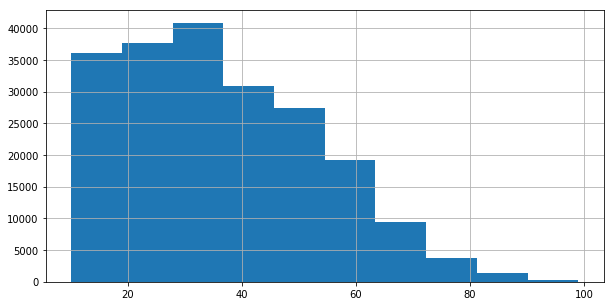

In [124]:
histograms = df2017['Victim Age'].hist(figsize=(10,5))

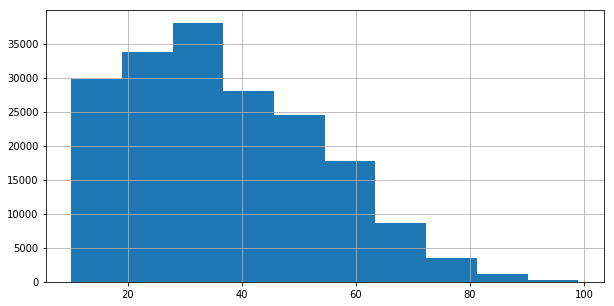

In [125]:
histograms = df2018['Victim Age'].hist(figsize=(10,5))

In [126]:
descent1 = {'A':'Other Asian','B' : 'Black','C' : 'Chinese','D' : 'Cambodian','F' : 'Filipino',
                'G' : 'Guamanian','H' : 'Hispanic/Latin/Mexican','I' : 'American Indian/Alaskan Native', 
                'J' : 'Japanese','K' : 'Korean','L' : 'Laotian','O' : 'Other','P' : 'Pacific Islander', 
                'S' : 'Samoan','U' : 'Hawaiian' ,'V' : 'Vietnamese','W' : 'White','X' : 'Unknown','Z' : 'Asian Indian'
}

In [127]:
descents = df2017['Victim Descent'].value_counts().index.values
descents.sort()
descents

array(['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'O', 'P', 'S',
       'U', 'V', 'W', 'X', 'Z'], dtype=object)

In [128]:
countsDescent = df2017['Victim Descent'].value_counts()
for descent in descents:
    descNum = countsDescent[descent]
    percentageDesc = round((descNum/df2017Rows)*100,2)
    print("Percentage of victim's descent ",descent1[descent]," in 2017 are: ",percentageDesc,"%")

Percentage of victim's descent  Other Asian  in 2017 are:  2.73 %
Percentage of victim's descent  Black  in 2017 are:  16.08 %
Percentage of victim's descent  Chinese  in 2017 are:  0.06 %
Percentage of victim's descent  Cambodian  in 2017 are:  0.0 %
Percentage of victim's descent  Filipino  in 2017 are:  0.11 %
Percentage of victim's descent  Guamanian  in 2017 are:  0.01 %
Percentage of victim's descent  Hispanic/Latin/Mexican  in 2017 are:  35.67 %
Percentage of victim's descent  American Indian/Alaskan Native  in 2017 are:  0.05 %
Percentage of victim's descent  Japanese  in 2017 are:  0.01 %
Percentage of victim's descent  Korean  in 2017 are:  0.39 %
Percentage of victim's descent  Other  in 2017 are:  9.71 %
Percentage of victim's descent  Pacific Islander  in 2017 are:  0.02 %
Percentage of victim's descent  Samoan  in 2017 are:  0.0 %
Percentage of victim's descent  Hawaiian  in 2017 are:  0.01 %
Percentage of victim's descent  Vietnamese  in 2017 are:  0.0 %
Percentage of vi

In [129]:
df2018['Victim Descent'].value_counts()

H    65705
W    43701
B    30891
X    20673
O    17628
A     5343
K      703
F      198
C       98
I       89
J       41
V       27
P       23
Z       22
U       16
G        8
D        4
S        3
L        1
-        1
Name: Victim Descent, dtype: int64

In [130]:
df2018['Victim Descent'].fillna("O", inplace=True)

df2018 = df2018[~df2018['Victim Descent'].str.contains("-")]

In [131]:
df2018['Victim Descent'].value_counts()

H    65705
W    43701
B    30891
X    20673
O    17628
A     5343
K      703
F      198
C       98
I       89
J       41
V       27
P       23
Z       22
U       16
G        8
D        4
S        3
L        1
Name: Victim Descent, dtype: int64

In [132]:
descents = df2018['Victim Descent'].value_counts().index.values
descents.sort()
descents

array(['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'O', 'P',
       'S', 'U', 'V', 'W', 'X', 'Z'], dtype=object)

In [133]:
countsDescent = df2018['Victim Descent'].value_counts()
for descent in descents:
    descNum = countsDescent[descent]
    percentageDesc = round((descNum/df2018Rows)*100,2)
    print("Percentage of victim's descent ",descent1[descent]," in 2018 are: ",percentageDesc,"%")

Percentage of victim's descent  Other Asian  in 2018 are:  2.89 %
Percentage of victim's descent  Black  in 2018 are:  16.68 %
Percentage of victim's descent  Chinese  in 2018 are:  0.05 %
Percentage of victim's descent  Cambodian  in 2018 are:  0.0 %
Percentage of victim's descent  Filipino  in 2018 are:  0.11 %
Percentage of victim's descent  Guamanian  in 2018 are:  0.0 %
Percentage of victim's descent  Hispanic/Latin/Mexican  in 2018 are:  35.48 %
Percentage of victim's descent  American Indian/Alaskan Native  in 2018 are:  0.05 %
Percentage of victim's descent  Japanese  in 2018 are:  0.02 %
Percentage of victim's descent  Korean  in 2018 are:  0.38 %
Percentage of victim's descent  Laotian  in 2018 are:  0.0 %
Percentage of victim's descent  Other  in 2018 are:  9.52 %
Percentage of victim's descent  Pacific Islander  in 2018 are:  0.01 %
Percentage of victim's descent  Samoan  in 2018 are:  0.0 %
Percentage of victim's descent  Hawaiian  in 2018 are:  0.01 %
Percentage of victim

In [134]:
descent_2 = {'A': 1,'B' : 2,'C' : 3,'D' : 4,'F' : 5,
                'G' : 6,'H' : 7,'I' : 8, 
                'J' : 9,'K' : 10,'L' : 11,'O' : 12,'P' : 13, 
                'S' : 14,'U' : 15 ,'V' : 16,'W' : 17,'X' : 18,'Z' : 19}

In [135]:
sex1 = {'M': 1,'F' : 2,'U' : 3}

## Predictions 2017


##### Victim Descent

In [136]:
df2_2017 = pd.DataFrame(index=df2017.index)
df2_2017['Lat'] = df2017['Lat']
df2_2017['Lon'] = df2017['Lon']
df2_2017['Lat'] = pd.to_numeric(df2_2017['Lat'])
df2_2017['Lon'] = pd.to_numeric(df2_2017['Lon'])
df2_2017['Date-Time Occured'] = df2017['Date-Time Occured']
df2_2017['Time'] = df2017['Date-Time Occured'].dt.hour + (df2017['Date-Time Occured'].dt.minute/60) + (df2017['Date-Time Occured'].dt.second/3600)
df2_2017['Weekday'] = df2_2017['Date-Time Occured'].dt.dayofweek
df2_2017['Area ID'] = df2017['Area ID']
df2_2017['Crime Code'] = df2017['Crime Code']
df2_2017['Victim Descent'] = df2017['Victim Descent']
df2_2017['Victim Age'] = df2017['Victim Age']
df2_2017['Victim Sex'] = df2017['Victim Sex']
del df2_2017['Date-Time Occured']
df2_2017

,Lat,Lon,Time,Weekday,Area ID,Crime Code,Victim Descent,Victim Age,Victim Sex
1308923,34.0886,-118.2979,19.500000,4,2,510,X,16.0,U
1382661,34.0512,-118.2787,17.000000,5,2,510,X,16.0,U
1383229,34.0328,-118.2915,7.750000,1,3,510,X,16.0,U
1383510,34.0676,-118.2202,0.016667,4,4,510,X,16.0,U
1383605,33.7347,-118.2842,7.500000,5,5,510,X,16.0,U
1383932,34.0762,-118.3441,23.000000,0,7,510,X,16.0,U
1384619,34.0510,-118.2480,17.000000,3,1,510,X,16.0,U
1384681,34.0480,-118.2438,20.500000,1,1,330,B,29.0,M
1384950,34.0210,-118.2123,10.000000,3,4,510,X,16.0,U
1385019,34.0699,-118.2595,3.000000,4,2,510,X,16.0,U


In [137]:
df2_2017 = df2_2017.replace({'Victim Descent': descent_2})
df2_2017 = df2_2017.replace({'Victim Sex': sex1})
df2_2017

,Lat,Lon,Time,Weekday,Area ID,Crime Code,Victim Descent,Victim Age,Victim Sex
1308923,34.0886,-118.2979,19.500000,4,2,510,18,16.0,3
1382661,34.0512,-118.2787,17.000000,5,2,510,18,16.0,3
1383229,34.0328,-118.2915,7.750000,1,3,510,18,16.0,3
1383510,34.0676,-118.2202,0.016667,4,4,510,18,16.0,3
1383605,33.7347,-118.2842,7.500000,5,5,510,18,16.0,3
1383932,34.0762,-118.3441,23.000000,0,7,510,18,16.0,3
1384619,34.0510,-118.2480,17.000000,3,1,510,18,16.0,3
1384681,34.0480,-118.2438,20.500000,1,1,330,2,29.0,1
1384950,34.0210,-118.2123,10.000000,3,4,510,18,16.0,3
1385019,34.0699,-118.2595,3.000000,4,2,510,18,16.0,3


In [138]:
df2_2017.dtypes

Lat               float64
Lon               float64
Time              float64
Weekday             int64
Area ID             int64
Crime Code          int64
Victim Descent      int64
Victim Age        float64
Victim Sex          int64
dtype: object

In [139]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn import model_selection
from pandas import DataFrame, get_dummies
mtl.rcParams['agg.path.chunksize'] = 10000

In [140]:
experiments = {"Algorithm":["Ordinary Least Squares", "Regression Tree", 
                            "Big Random Forest", "Random Forest", 
                            "Bagging"], 
               "Objects" : [lambda : LinearRegression(), 
                            lambda : DecisionTreeRegressor(), 
                            lambda : RandomForestRegressor(n_estimators=100), 
                            lambda : RandomForestRegressor(), 
                            lambda : BaggingRegressor()], 
               "Predictions":[[] for _ in range(5)]}
actuals = []

In [141]:
from sklearn.model_selection import train_test_split
[_.shape for _ in  train_test_split(df2_2017.drop("Victim Descent", axis=1), 
                                    df2_2017["Victim Descent"], test_size=0.25)]

[(155290, 8), (51764, 8), (155290,), (51764,)]

In [142]:
for _ in range (4):
    train_X, test_X, train_y, test_y = (
        train_test_split(df2_2017.drop("Victim Descent", axis=1), 
                         df2_2017["Victim Descent"], test_size=0.25))
    for i, obj_factory in enumerate(experiments["Objects"]):
        obj = obj_factory()
        obj.fit(y=train_y,X=train_X)
        experiments["Predictions"][i] += list(obj.predict(test_X))
    actuals += list(test_y)
actuals = pd.Series(actuals)
experiments["Predictions"] = list(map(pd.Series, experiments["Predictions"]))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


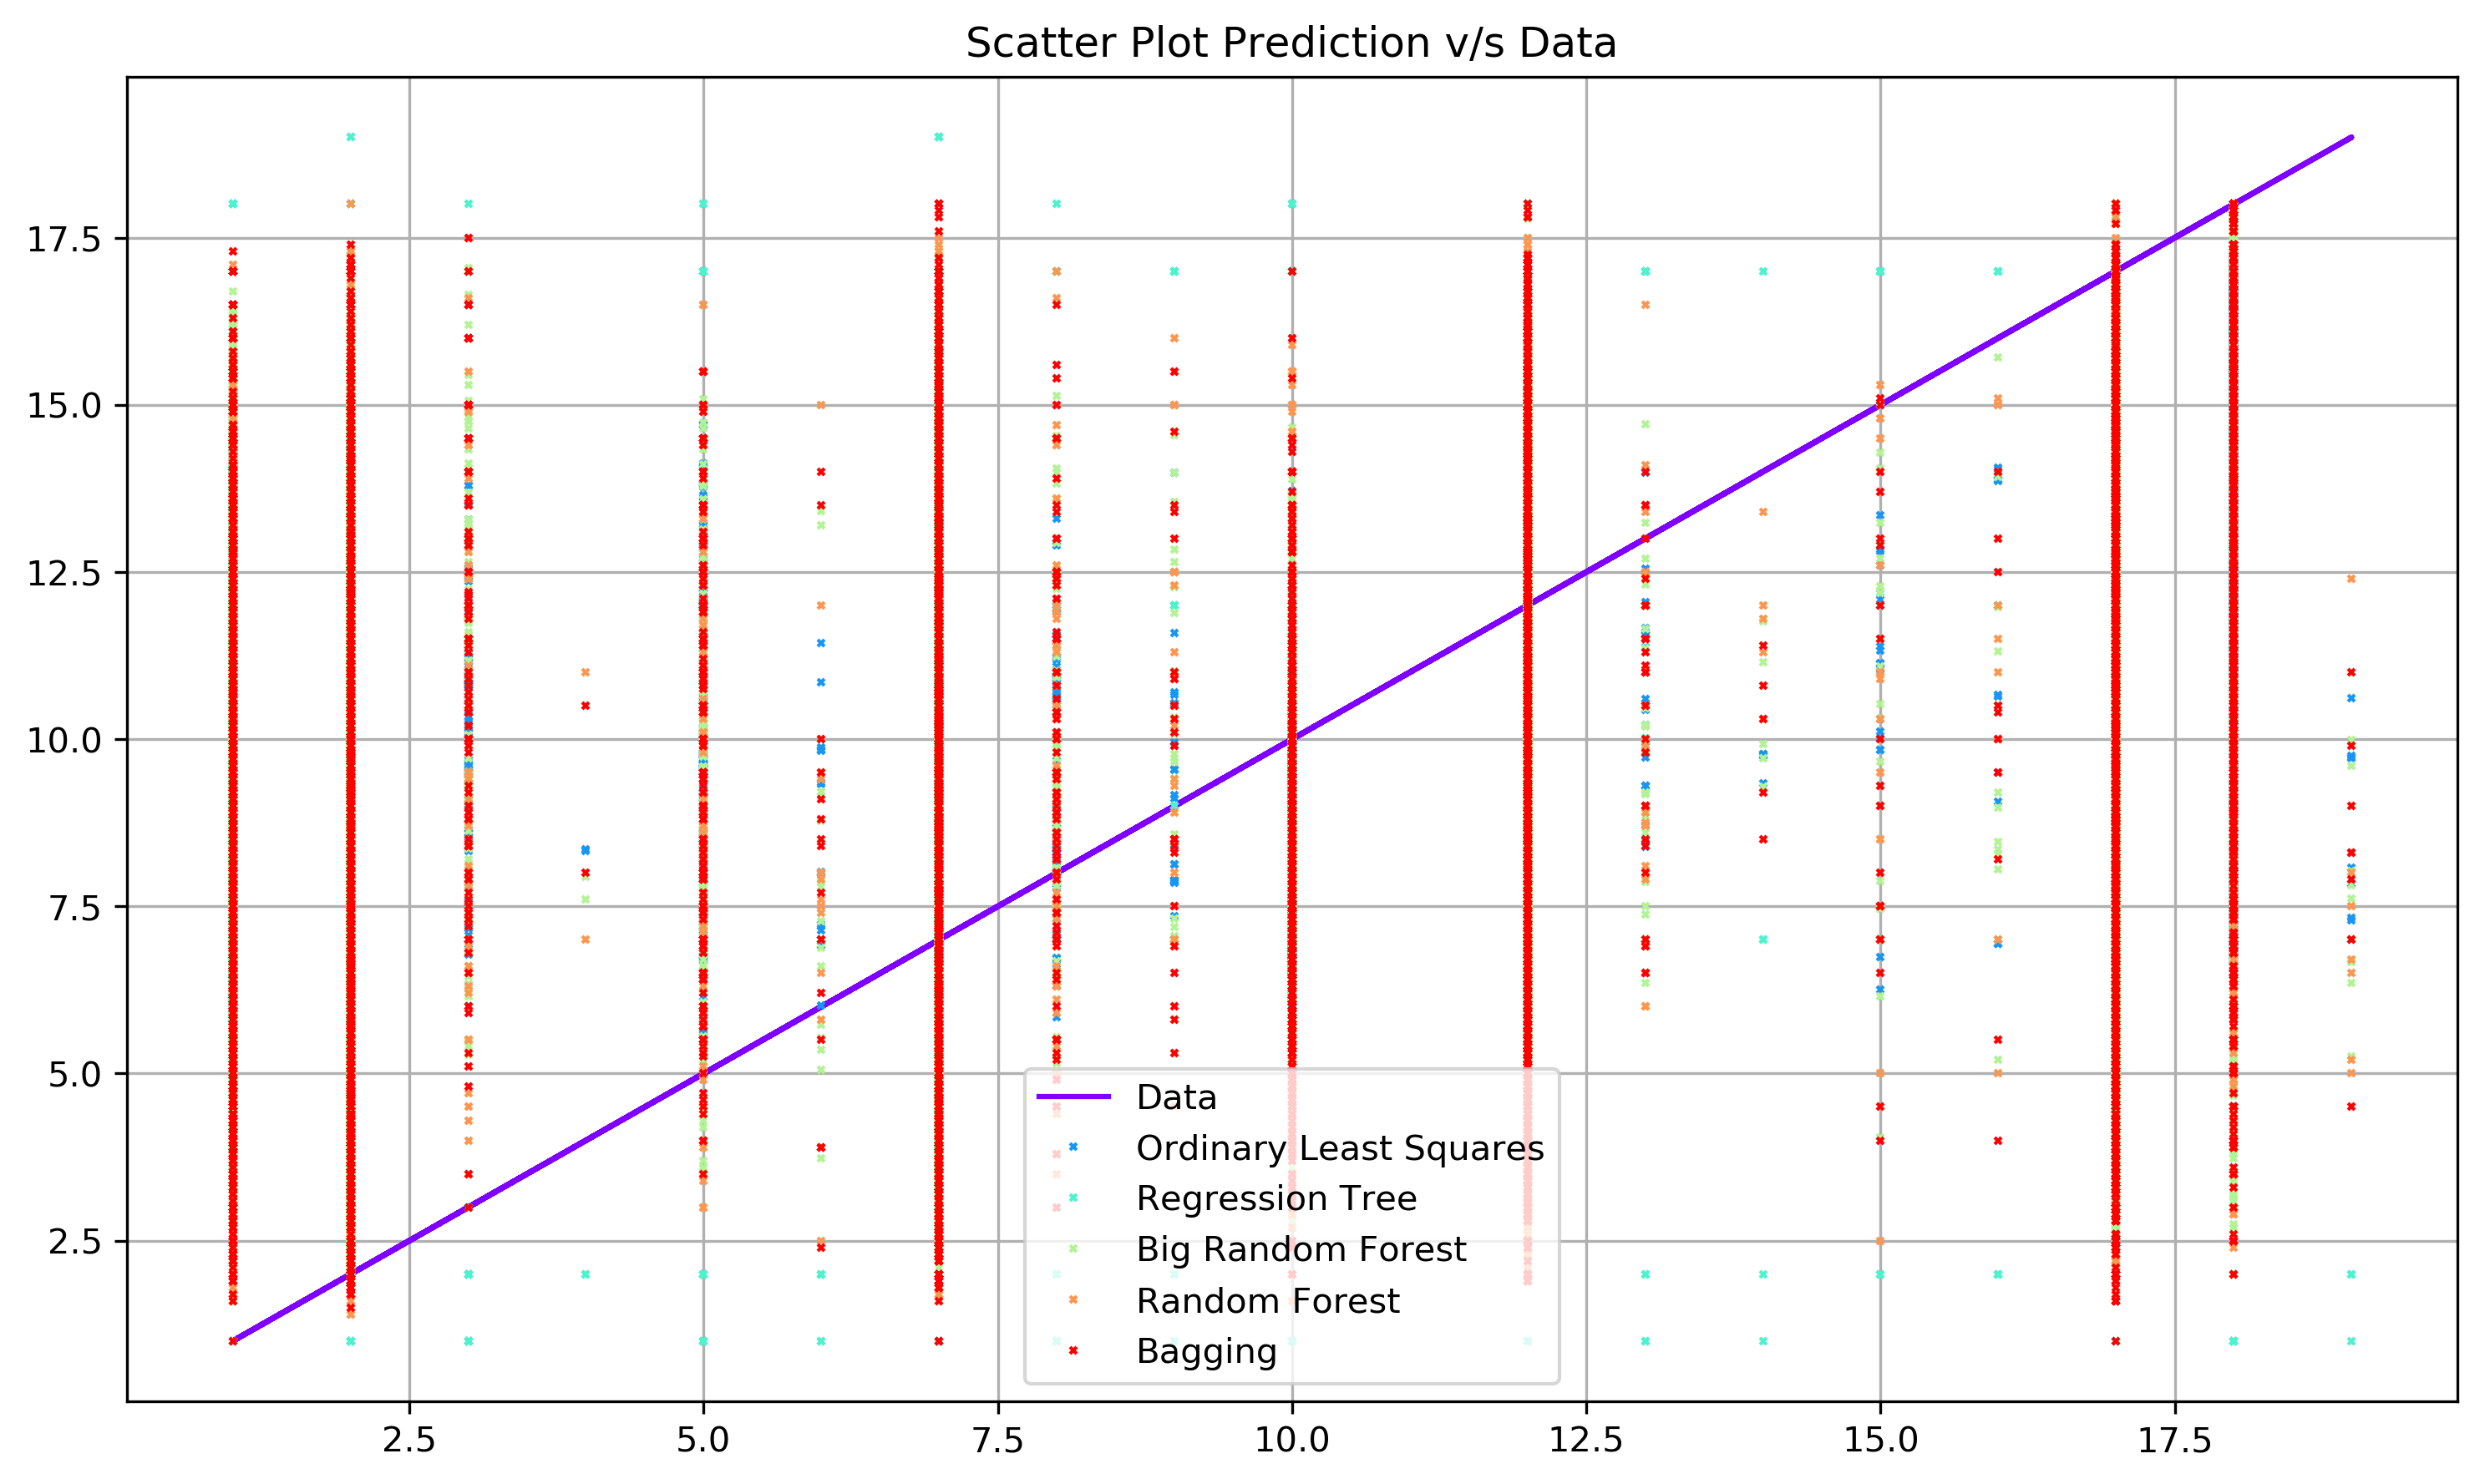

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
color=iter(cm.rainbow(np.linspace(0,1,len(experiments)+3)))
plt.figure(figsize=(12,7),dpi=300)
plt.plot(actuals,actuals,c=next(color),markersize=2,label='Data')
for _, row in DataFrame(experiments).iterrows():
    plt.plot(actuals, row["Predictions"],'x',c=next(color),
             markersize=2,label=row['Algorithm'])
plt.title('Scatter Plot Prediction v/s Data')
plt.grid(True)
plt.legend()
plt.show()

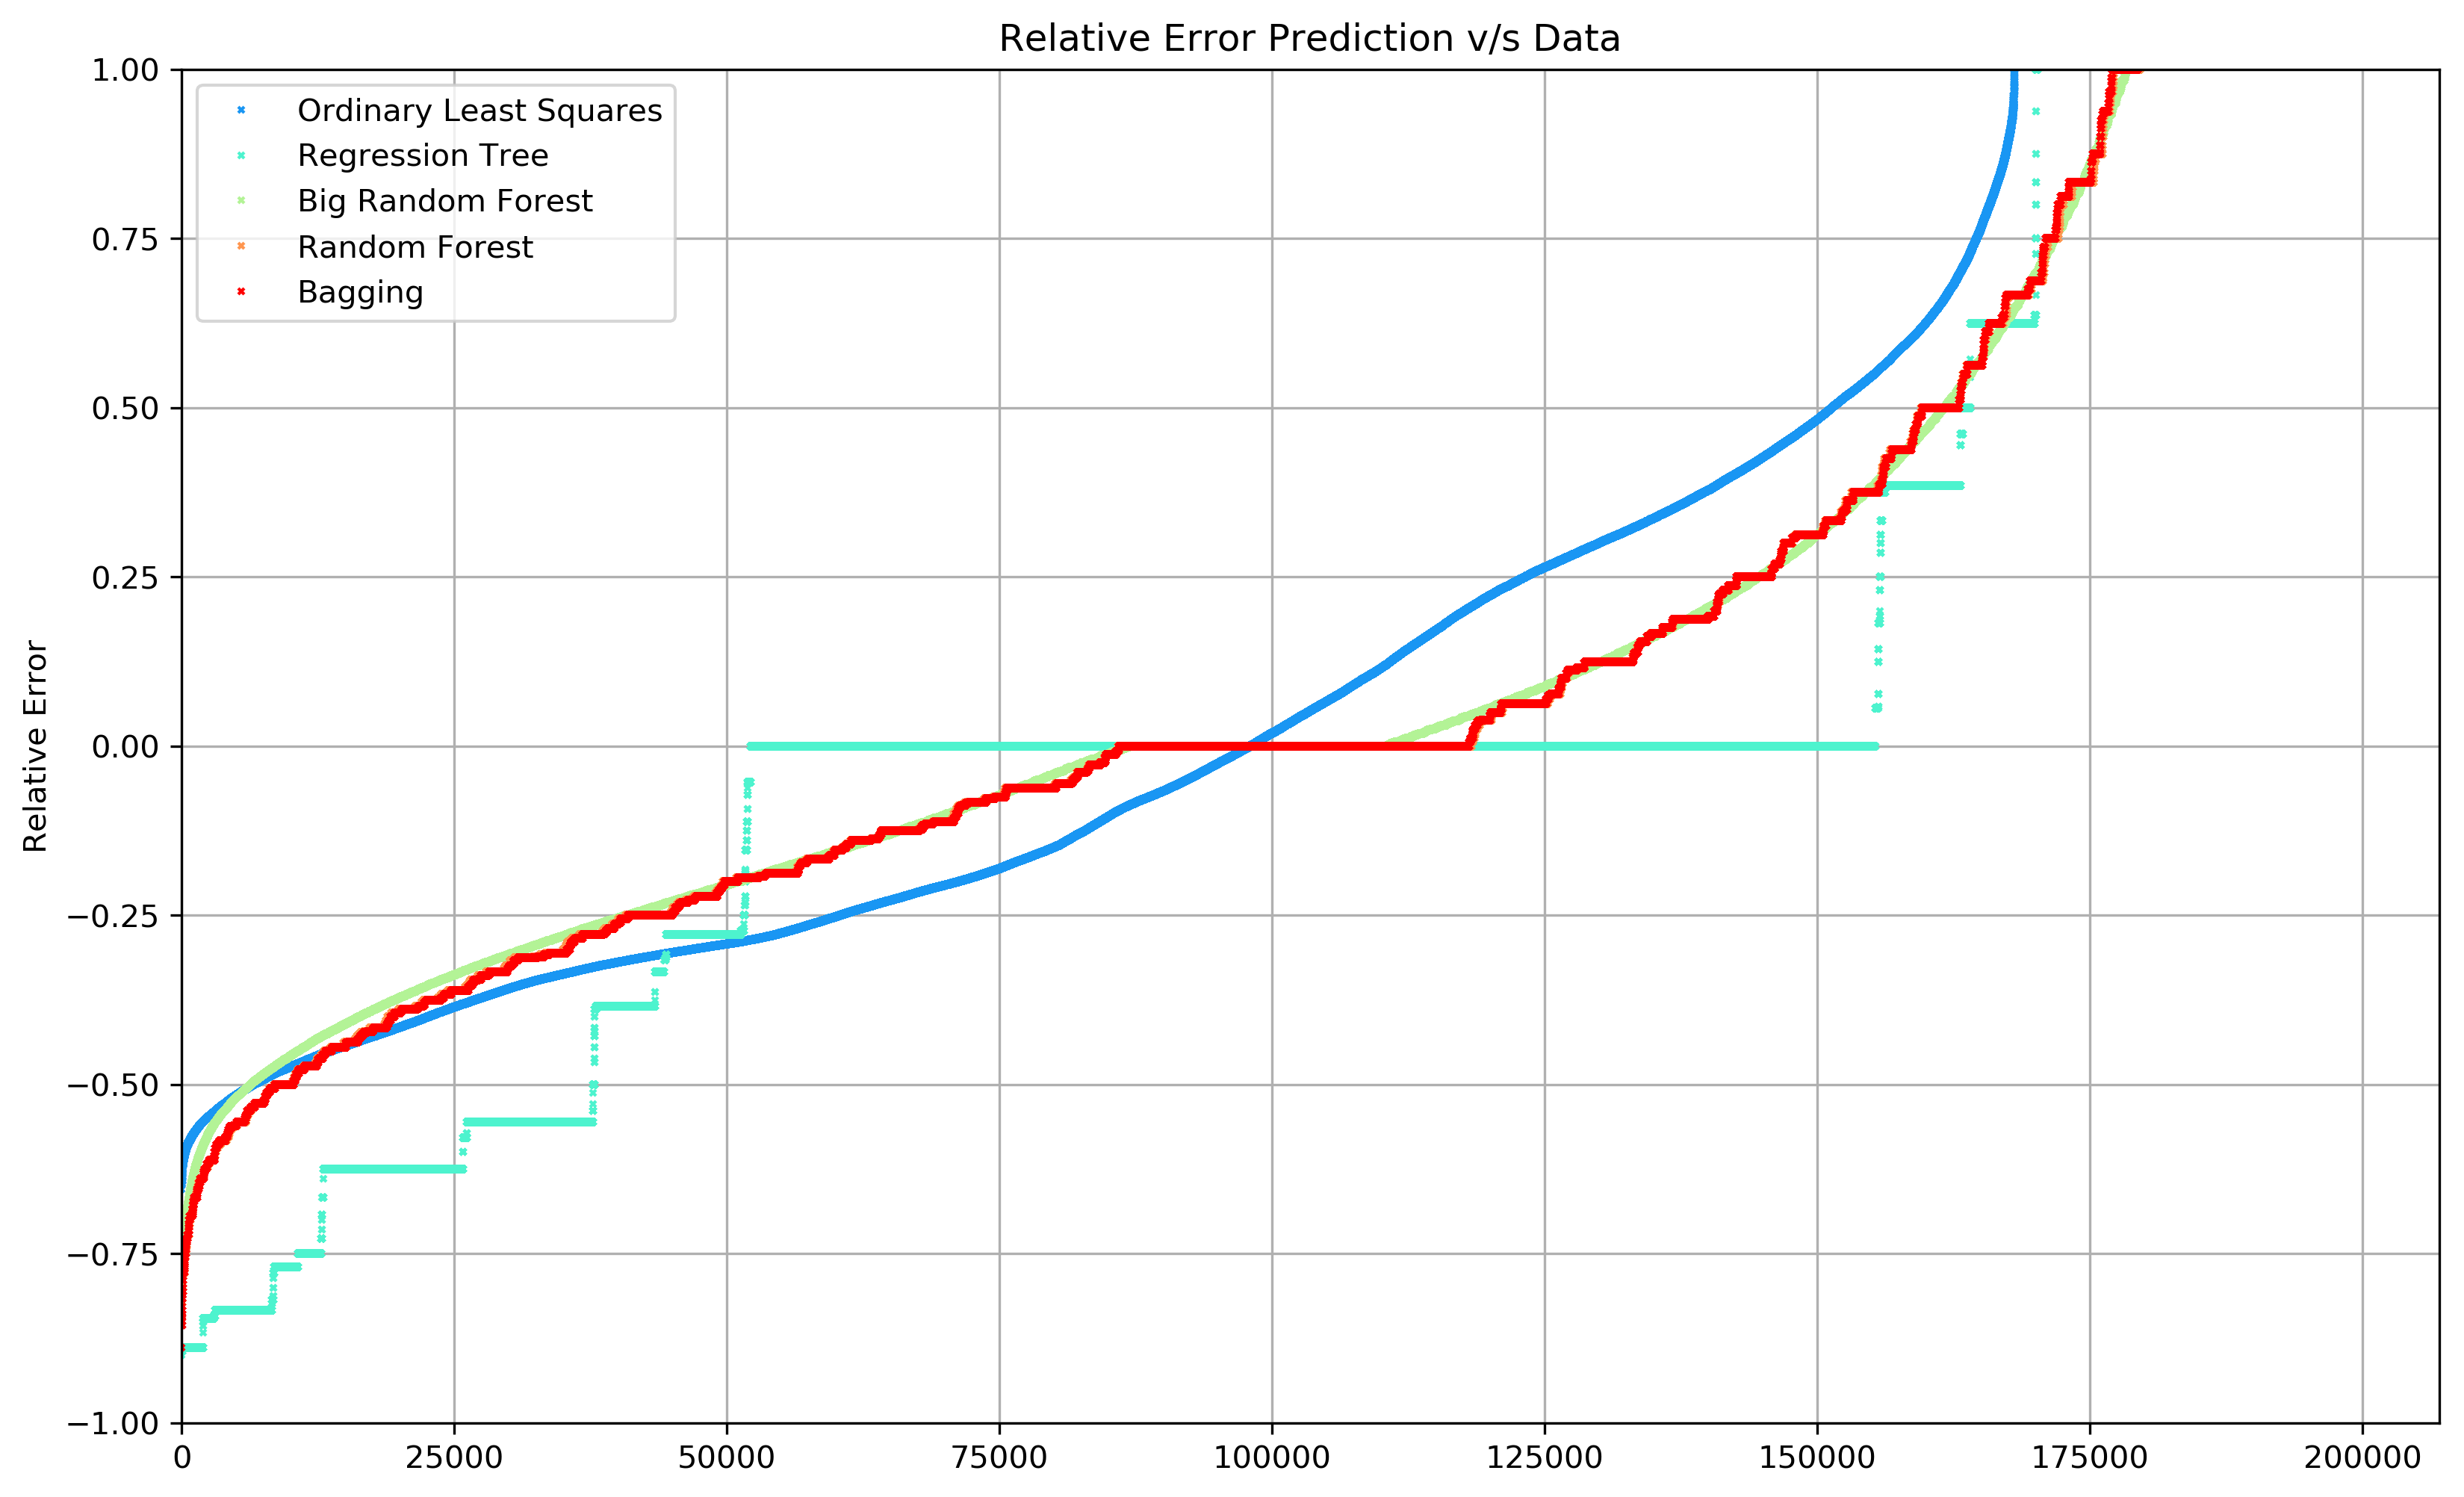

In [144]:
color=iter(cm.rainbow(np.linspace(0,1,len(experiments)+3)))
next(color)
plt.figure(figsize=(13,8),dpi=300)
for index, row in DataFrame(experiments).iterrows():
    relative_error = (row["Predictions"] - actuals) / (1 + abs(actuals))
    plt.plot(np.sort(relative_error),'x',c=next(color),
             markersize=2,label=row['Algorithm'])
plt.title('Relative Error Prediction v/s Data')
plt.ylabel('Relative Error')
plt.grid(True)
plt.legend()
plt.axis([0,len(actuals),-1,1])
plt.show()

In [145]:
experiments["Results"] = []
for o in experiments["Objects"]:
    experiments["Results"].append(
        model_selection.cross_val_score(o(), y=df2_2017['Victim Descent'], 
                                        X=df2_2017.drop("Victim Descent", axis=1),
                                        cv=5).mean())

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [146]:
DataFrame(experiments).drop(["Objects", "Predictions"], 
                            axis=1).set_index("Algorithm")

,Results
Algorithm,
Ordinary Least Squares,0.135275
Regression Tree,-0.137305
Big Random Forest,0.417824
Random Forest,0.366543
Bagging,0.367579


##### Victim Sex 

In [147]:
experiments = {"Algorithm":["Ordinary Least Squares", "Regression Tree", 
                            "Big Random Forest", "Random Forest", 
                            "Bagging"], 
               "Objects" : [lambda : LinearRegression(), 
                            lambda : DecisionTreeRegressor(), 
                            lambda : RandomForestRegressor(n_estimators=100), 
                            lambda : RandomForestRegressor(), 
                            lambda : BaggingRegressor()], 
               "Predictions":[[] for _ in range(5)]}
actuals = []

In [148]:
from sklearn.model_selection import train_test_split
[_.shape for _ in  train_test_split(df2_2017.drop("Victim Sex", axis=1), 
                                    df2_2017["Victim Sex"], test_size=0.25)]

[(155290, 8), (51764, 8), (155290,), (51764,)]

In [149]:
for _ in range (4):
    train_X, test_X, train_y, test_y = (
        train_test_split(df2_2017.drop("Victim Sex", axis=1), 
                         df2_2017["Victim Sex"], test_size=0.25))
    for i, obj_factory in enumerate(experiments["Objects"]):
        obj = obj_factory()
        obj.fit(y=train_y,X=train_X)
        experiments["Predictions"][i] += list(obj.predict(test_X))
    actuals += list(test_y)
actuals = pd.Series(actuals)
experiments["Predictions"] = list(map(pd.Series, experiments["Predictions"]))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


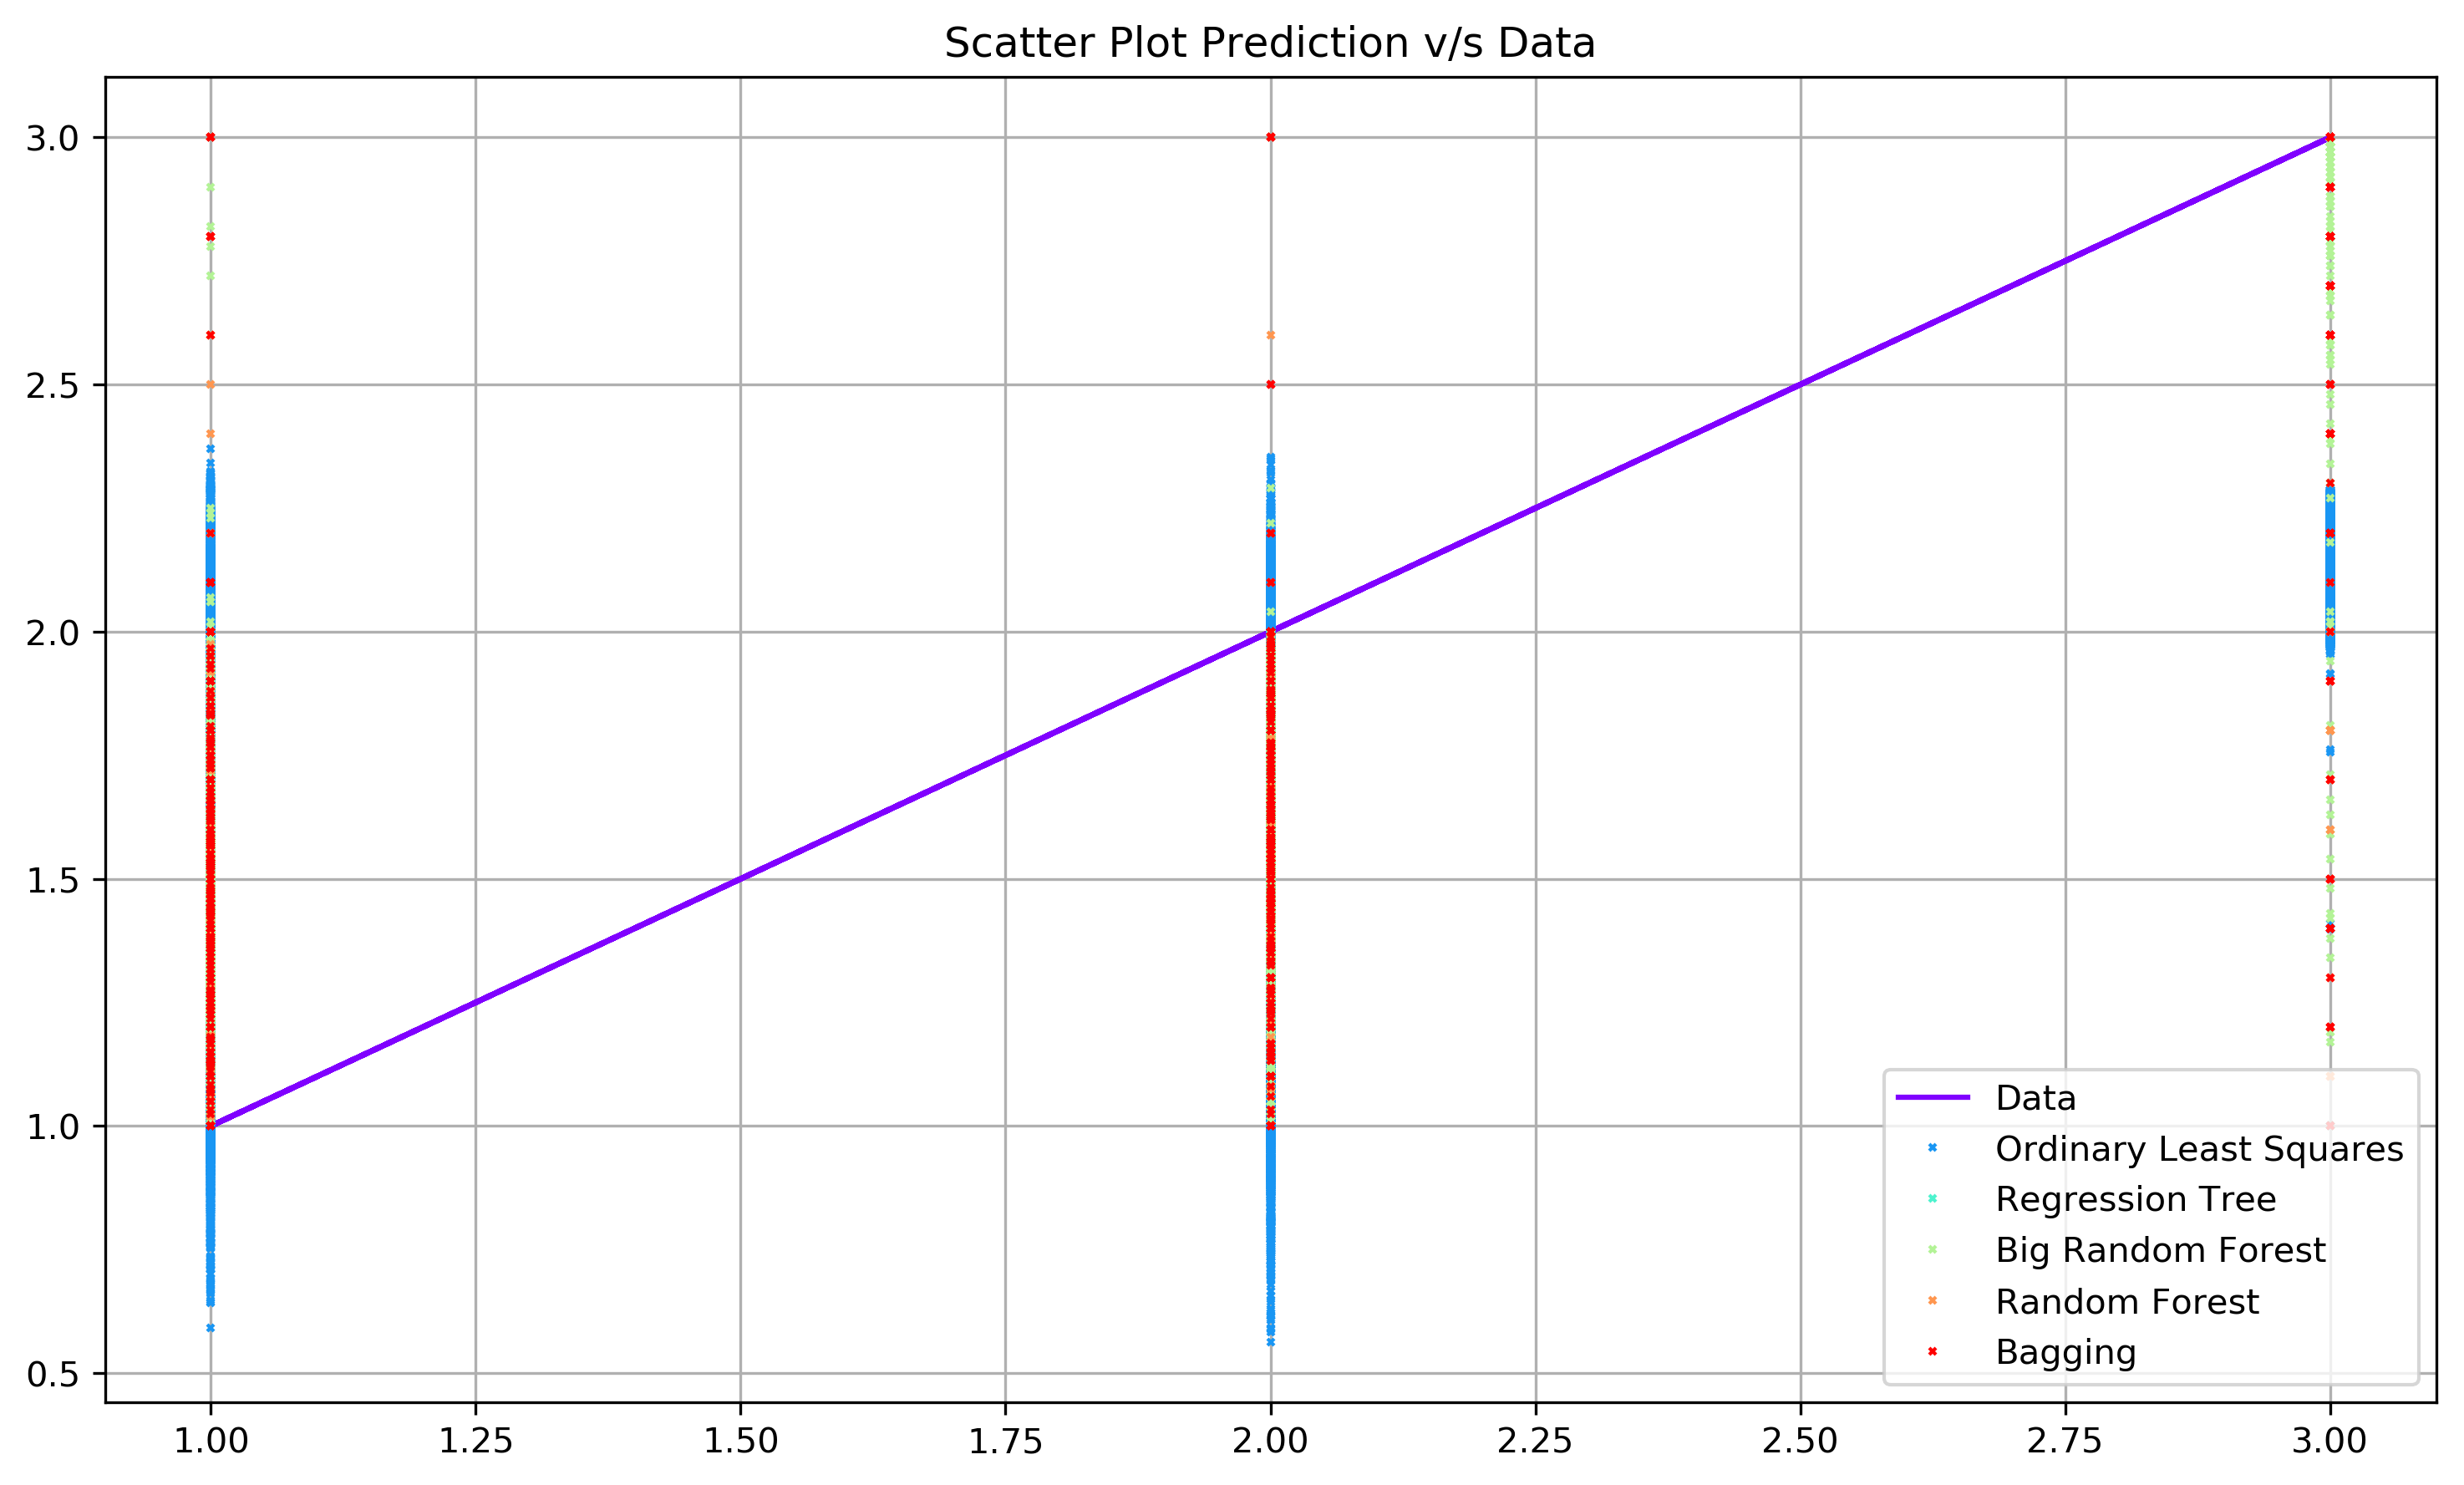

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
color=iter(cm.rainbow(np.linspace(0,1,len(experiments)+3)))
plt.figure(figsize=(12,7),dpi=300)
plt.plot(actuals,actuals,c=next(color),markersize=2,label='Data')
for _, row in DataFrame(experiments).iterrows():
    plt.plot(actuals, row["Predictions"],'x',c=next(color),
             markersize=2,label=row['Algorithm'])
plt.title('Scatter Plot Prediction v/s Data')
plt.grid(True)
plt.legend()
plt.show()

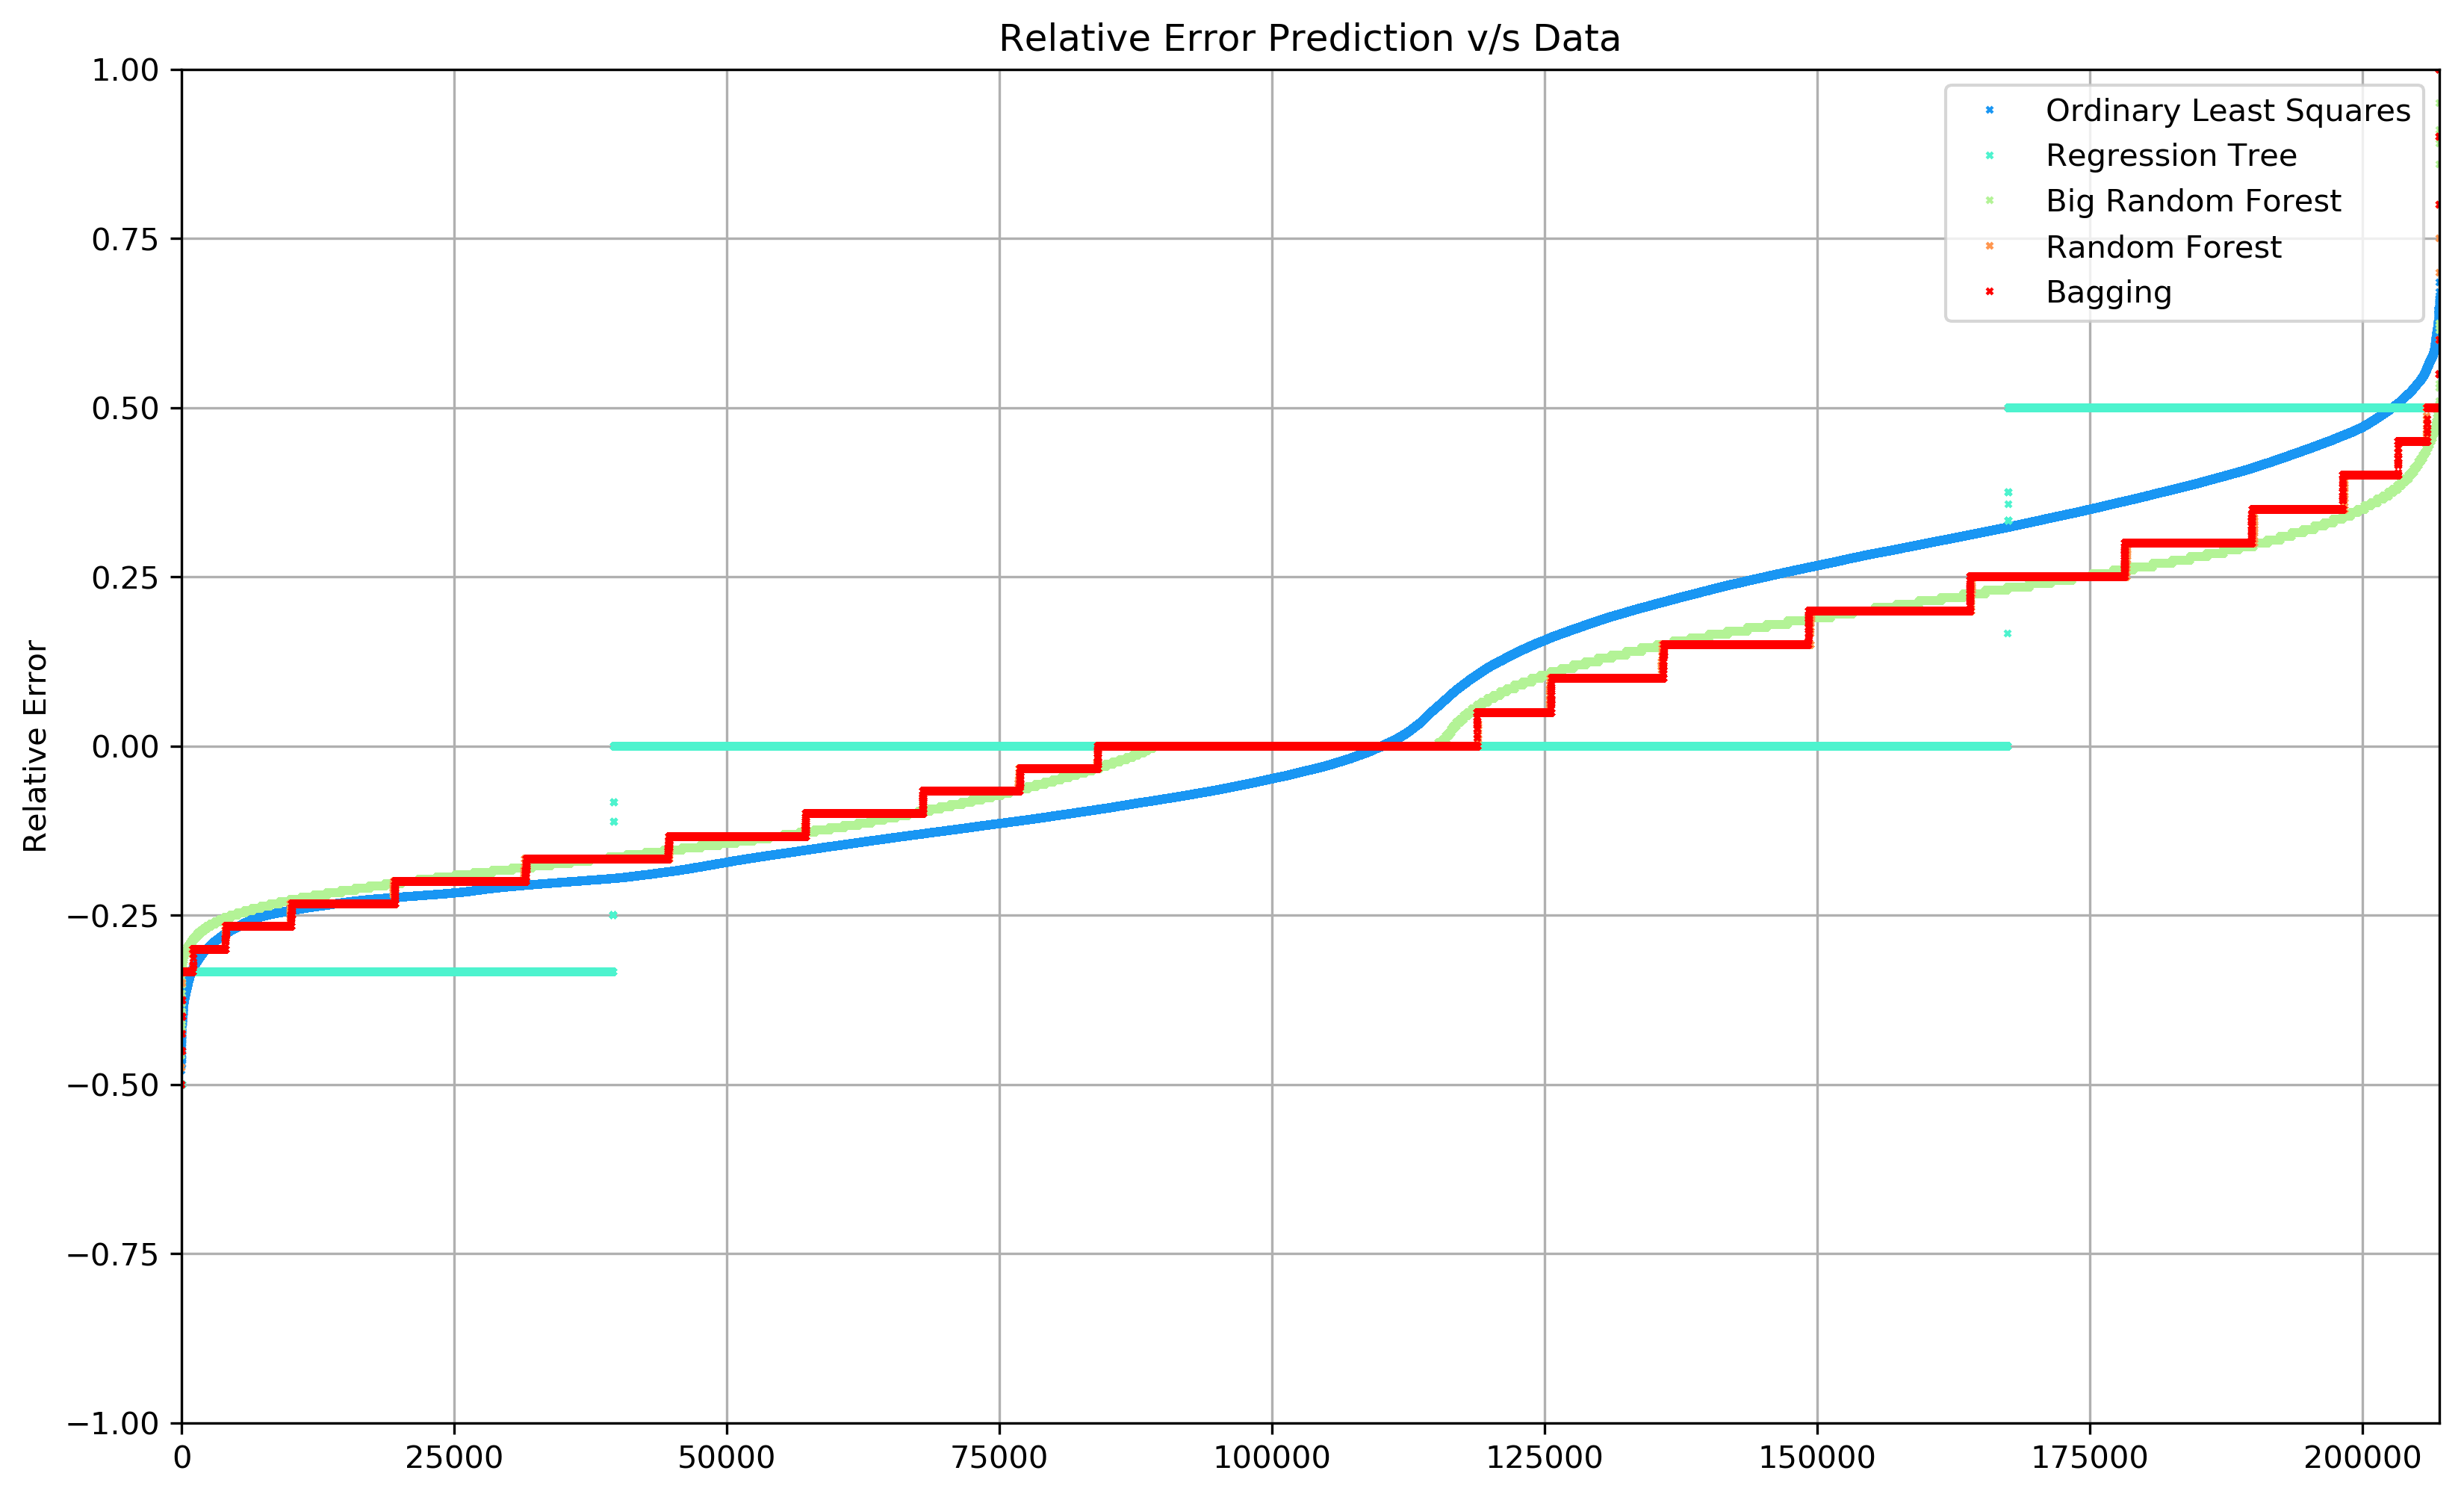

In [151]:
color=iter(cm.rainbow(np.linspace(0,1,len(experiments)+3)))
next(color)
plt.figure(figsize=(13,8),dpi=300)
for index, row in DataFrame(experiments).iterrows():
    relative_error = (row["Predictions"] - actuals) / (1 + abs(actuals))
    plt.plot(np.sort(relative_error),'x',c=next(color),
             markersize=2,label=row['Algorithm'])
plt.title('Relative Error Prediction v/s Data')
plt.ylabel('Relative Error')
plt.grid(True)
plt.legend()
plt.axis([0,len(actuals),-1,1])
plt.show()

In [152]:
experiments["Results"] = []
for o in experiments["Objects"]:
    experiments["Results"].append(
        model_selection.cross_val_score(o(), y=df2_2017['Victim Sex'], 
                                        X=df2_2017.drop("Victim Sex", axis=1),
                                        cv=5).mean())

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [153]:
DataFrame(experiments).drop(["Objects", "Predictions"], 
                            axis=1).set_index("Algorithm")

,Results
Algorithm,
Ordinary Least Squares,0.178570
Regression Tree,0.130760
Big Random Forest,0.540143
Random Forest,0.502257
Bagging,0.503071


##  Prediction 2018

##### Victim Descent

In [154]:
df2_2018 = pd.DataFrame(index=df2018.index)
df2_2018['Lat'] = df2018['Lat']
df2_2018['Lon'] = df2018['Lon']
df2_2018['Lat'] = pd.to_numeric(df2_2018['Lat'])
df2_2018['Lon'] = pd.to_numeric(df2_2018['Lon'])
df2_2018['Date-Time Occured'] = df2018['Date-Time Occured']
df2_2018['Time'] = df2018['Date-Time Occured'].dt.hour + (df2018['Date-Time Occured'].dt.minute/60) + (df2018['Date-Time Occured'].dt.second/3600)
df2_2018['Weekday'] = df2_2018['Date-Time Occured'].dt.dayofweek
df2_2018['Area ID'] = df2018['Area ID']
df2_2018['Crime Code'] = df2018['Crime Code']
df2_2018['Victim Descent'] = df2018['Victim Descent']
df2_2018['Victim Age'] = df2018['Victim Age']
df2_2018['Victim Sex'] = df2018['Victim Sex']
del df2_2018['Date-Time Occured']
df2_2018

,Lat,Lon,Time,Weekday,Area ID,Crime Code,Victim Descent,Victim Age,Victim Sex
1649416,34.0452,-118.2230,22.000000,0,4,510,X,17.0,U
1649670,33.9850,-118.2937,19.500000,1,12,510,X,17.0,U
1650156,34.0435,-118.2427,2.833333,0,1,440,B,62.0,M
1650157,34.0328,-118.2647,16.250000,4,1,624,B,52.0,M
1650160,34.0437,-118.2455,10.750000,0,1,745,H,50.0,M
1650161,34.0401,-118.2359,11.666667,0,1,330,W,31.0,F
1650162,34.0488,-118.2483,2.000000,0,1,624,H,32.0,M
1650163,34.0419,-118.2485,11.750000,0,1,230,B,33.0,F
1650164,34.0480,-118.2577,13.650000,0,1,442,B,33.0,M
1650165,34.0502,-118.2540,16.333333,0,1,624,H,23.0,M


In [155]:
df2_2018 = df2_2018.replace({'Victim Descent': descent_2})
df2_2018 = df2_2018.replace({'Victim Sex': sex1})
df2_2018

,Lat,Lon,Time,Weekday,Area ID,Crime Code,Victim Descent,Victim Age,Victim Sex
1649416,34.0452,-118.2230,22.000000,0,4,510,18,17.0,3
1649670,33.9850,-118.2937,19.500000,1,12,510,18,17.0,3
1650156,34.0435,-118.2427,2.833333,0,1,440,2,62.0,1
1650157,34.0328,-118.2647,16.250000,4,1,624,2,52.0,1
1650160,34.0437,-118.2455,10.750000,0,1,745,7,50.0,1
1650161,34.0401,-118.2359,11.666667,0,1,330,17,31.0,2
1650162,34.0488,-118.2483,2.000000,0,1,624,7,32.0,1
1650163,34.0419,-118.2485,11.750000,0,1,230,2,33.0,2
1650164,34.0480,-118.2577,13.650000,0,1,442,2,33.0,1
1650165,34.0502,-118.2540,16.333333,0,1,624,7,23.0,1


In [156]:
df2_2018.dtypes

Lat               float64
Lon               float64
Time              float64
Weekday             int64
Area ID             int64
Crime Code          int64
Victim Descent      int64
Victim Age        float64
Victim Sex          int64
dtype: object

In [157]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn import model_selection
from pandas import DataFrame, get_dummies
mtl.rcParams['agg.path.chunksize'] = 10000

In [158]:
experiments = {"Algorithm":["Ordinary Least Squares", "Regression Tree", 
                            "Big Random Forest", "Random Forest", 
                            "Bagging"], 
               "Objects" : [lambda : LinearRegression(), 
                            lambda : DecisionTreeRegressor(), 
                            lambda : RandomForestRegressor(n_estimators=100), 
                            lambda : RandomForestRegressor(), 
                            lambda : BaggingRegressor()], 
               "Predictions":[[] for _ in range(5)]}
actuals = []

In [159]:
from sklearn.model_selection import train_test_split
[_.shape for _ in  train_test_split(df2_2018.drop("Victim Descent", axis=1), 
                                    df2_2018["Victim Descent"], test_size=0.25)]

[(138880, 8), (46294, 8), (138880,), (46294,)]

In [160]:
for _ in range (4):
    train_X, test_X, train_y, test_y = (
        train_test_split(df2_2018.drop("Victim Descent", axis=1), 
                         df2_2018["Victim Descent"], test_size=0.25))
    for i, obj_factory in enumerate(experiments["Objects"]):
        obj = obj_factory()
        obj.fit(y=train_y,X=train_X)
        experiments["Predictions"][i] += list(obj.predict(test_X))
    actuals += list(test_y)
actuals = pd.Series(actuals)
experiments["Predictions"] = list(map(pd.Series, experiments["Predictions"]))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


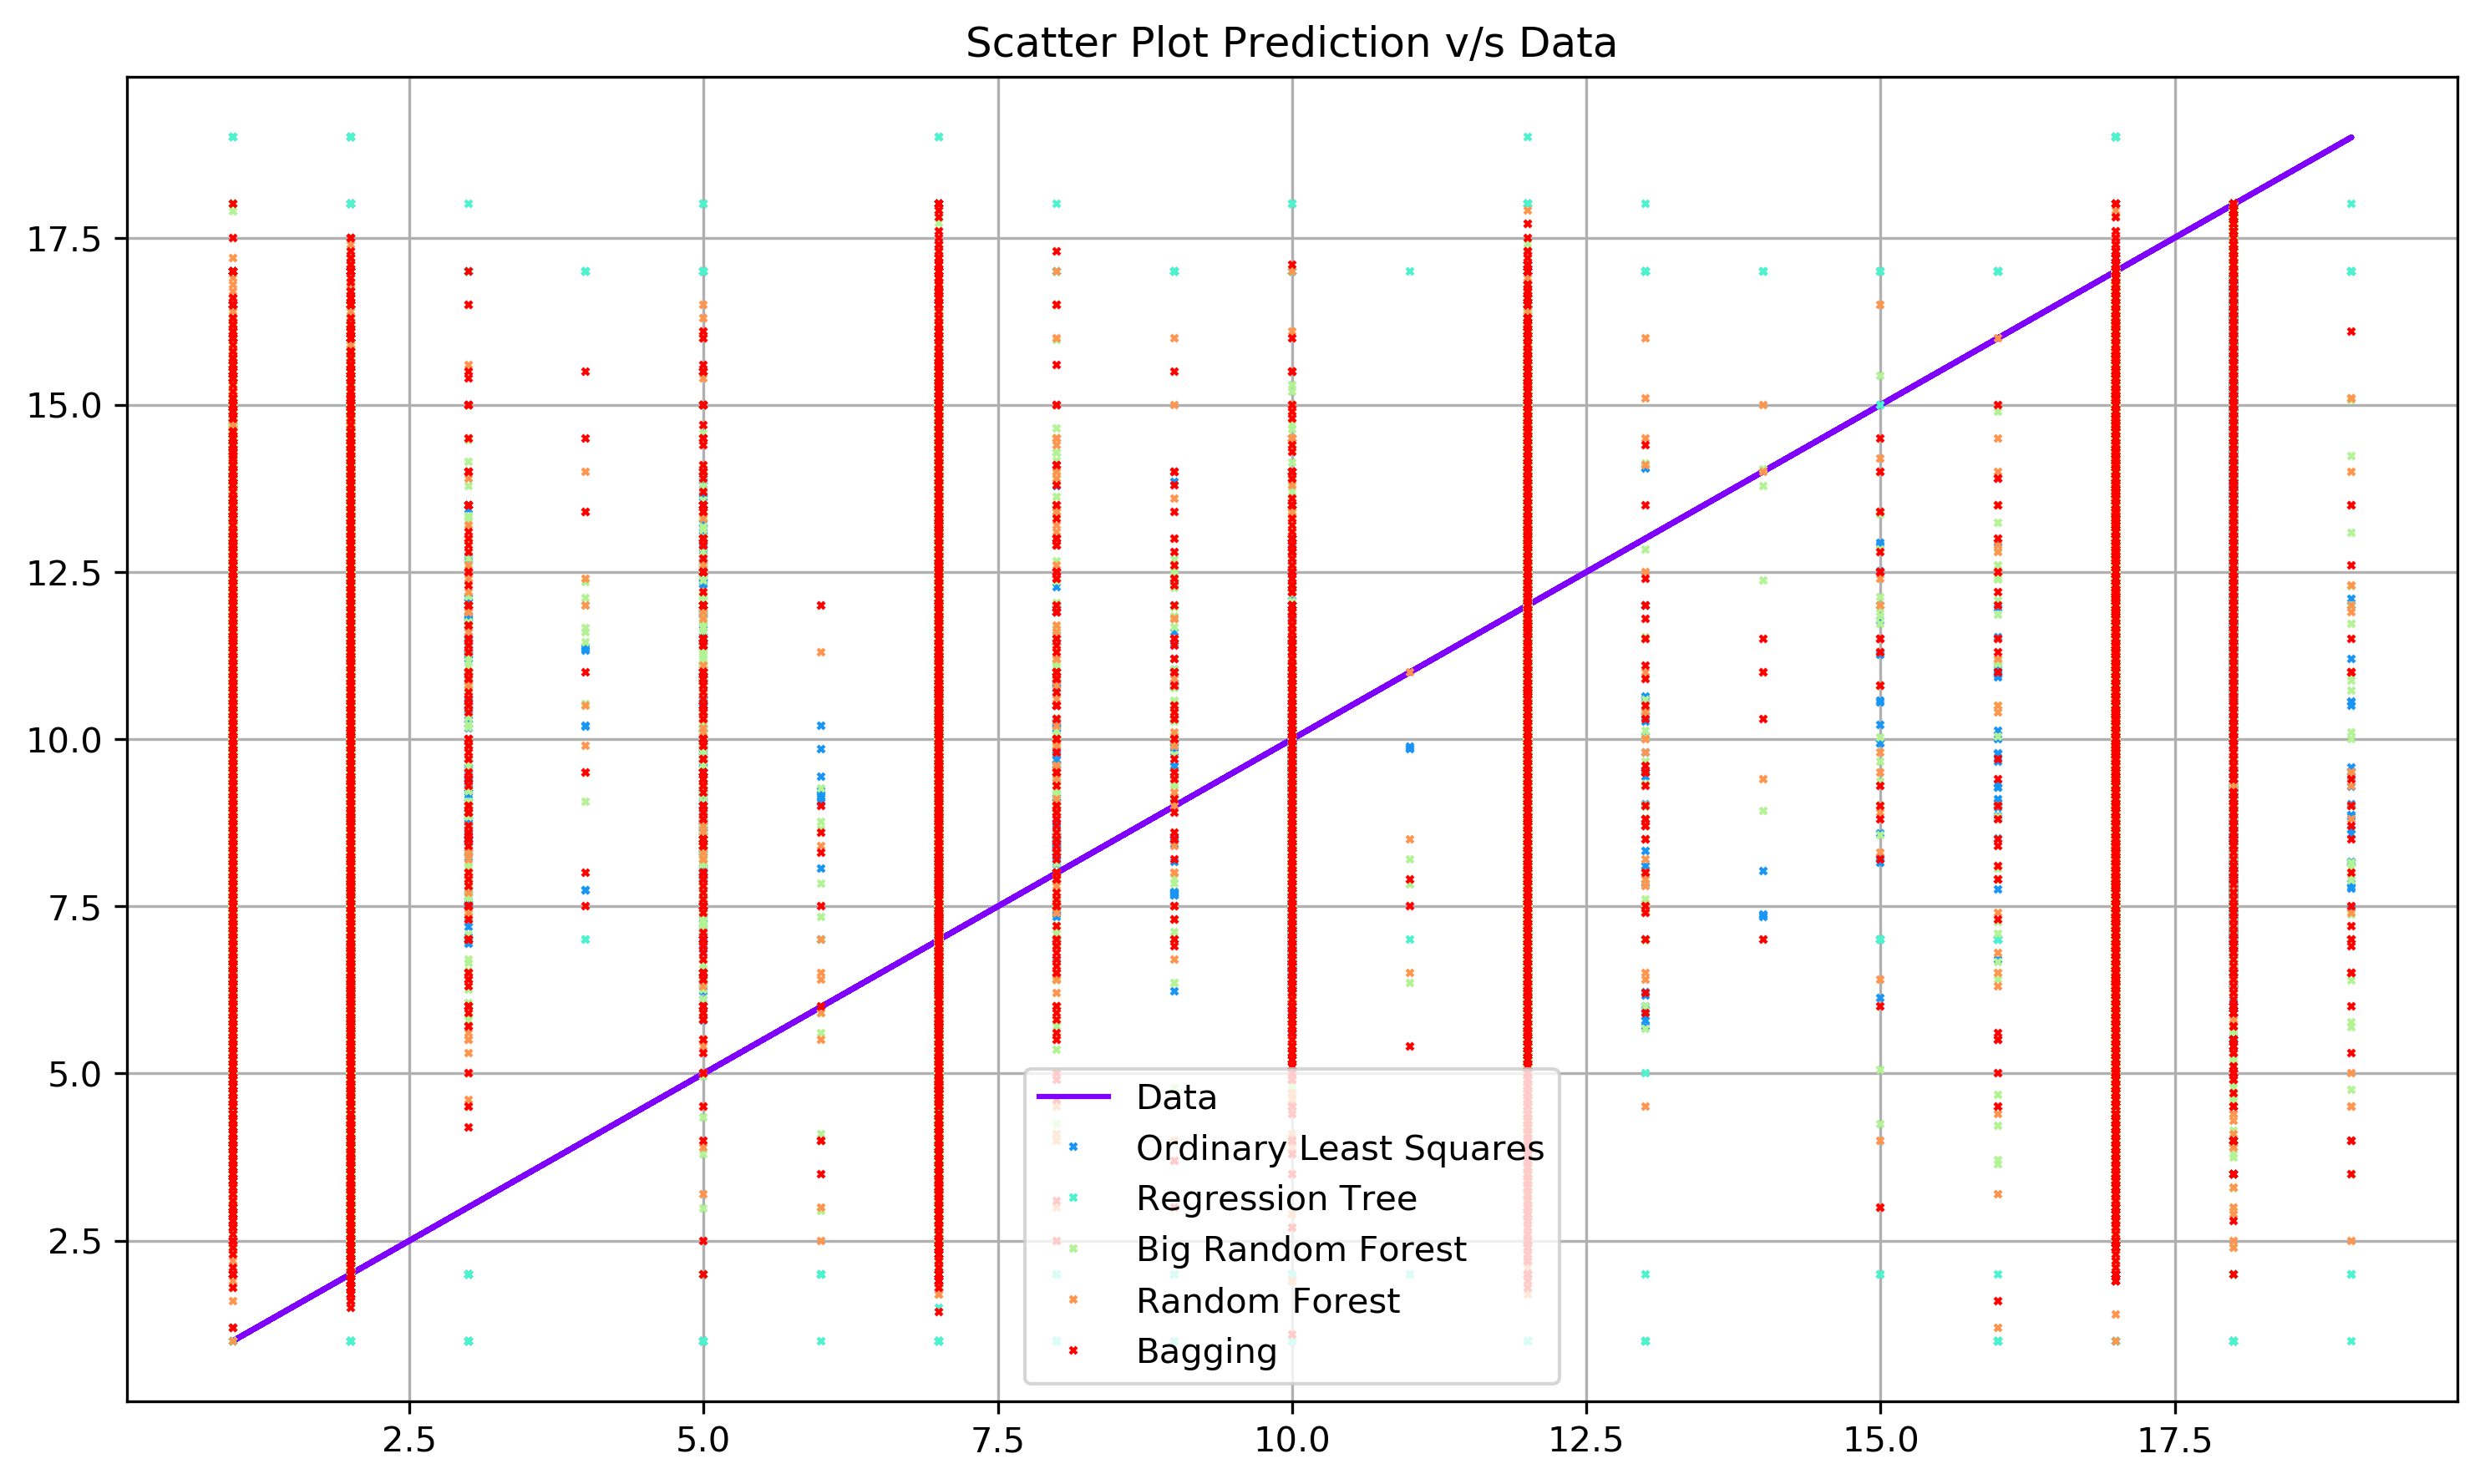

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
color=iter(cm.rainbow(np.linspace(0,1,len(experiments)+3)))
plt.figure(figsize=(12,7),dpi=300)
plt.plot(actuals,actuals,c=next(color),markersize=2,label='Data')
for _, row in DataFrame(experiments).iterrows():
    plt.plot(actuals, row["Predictions"],'x',c=next(color),
             markersize=2,label=row['Algorithm'])
plt.title('Scatter Plot Prediction v/s Data')
plt.grid(True)
plt.legend()
plt.show()

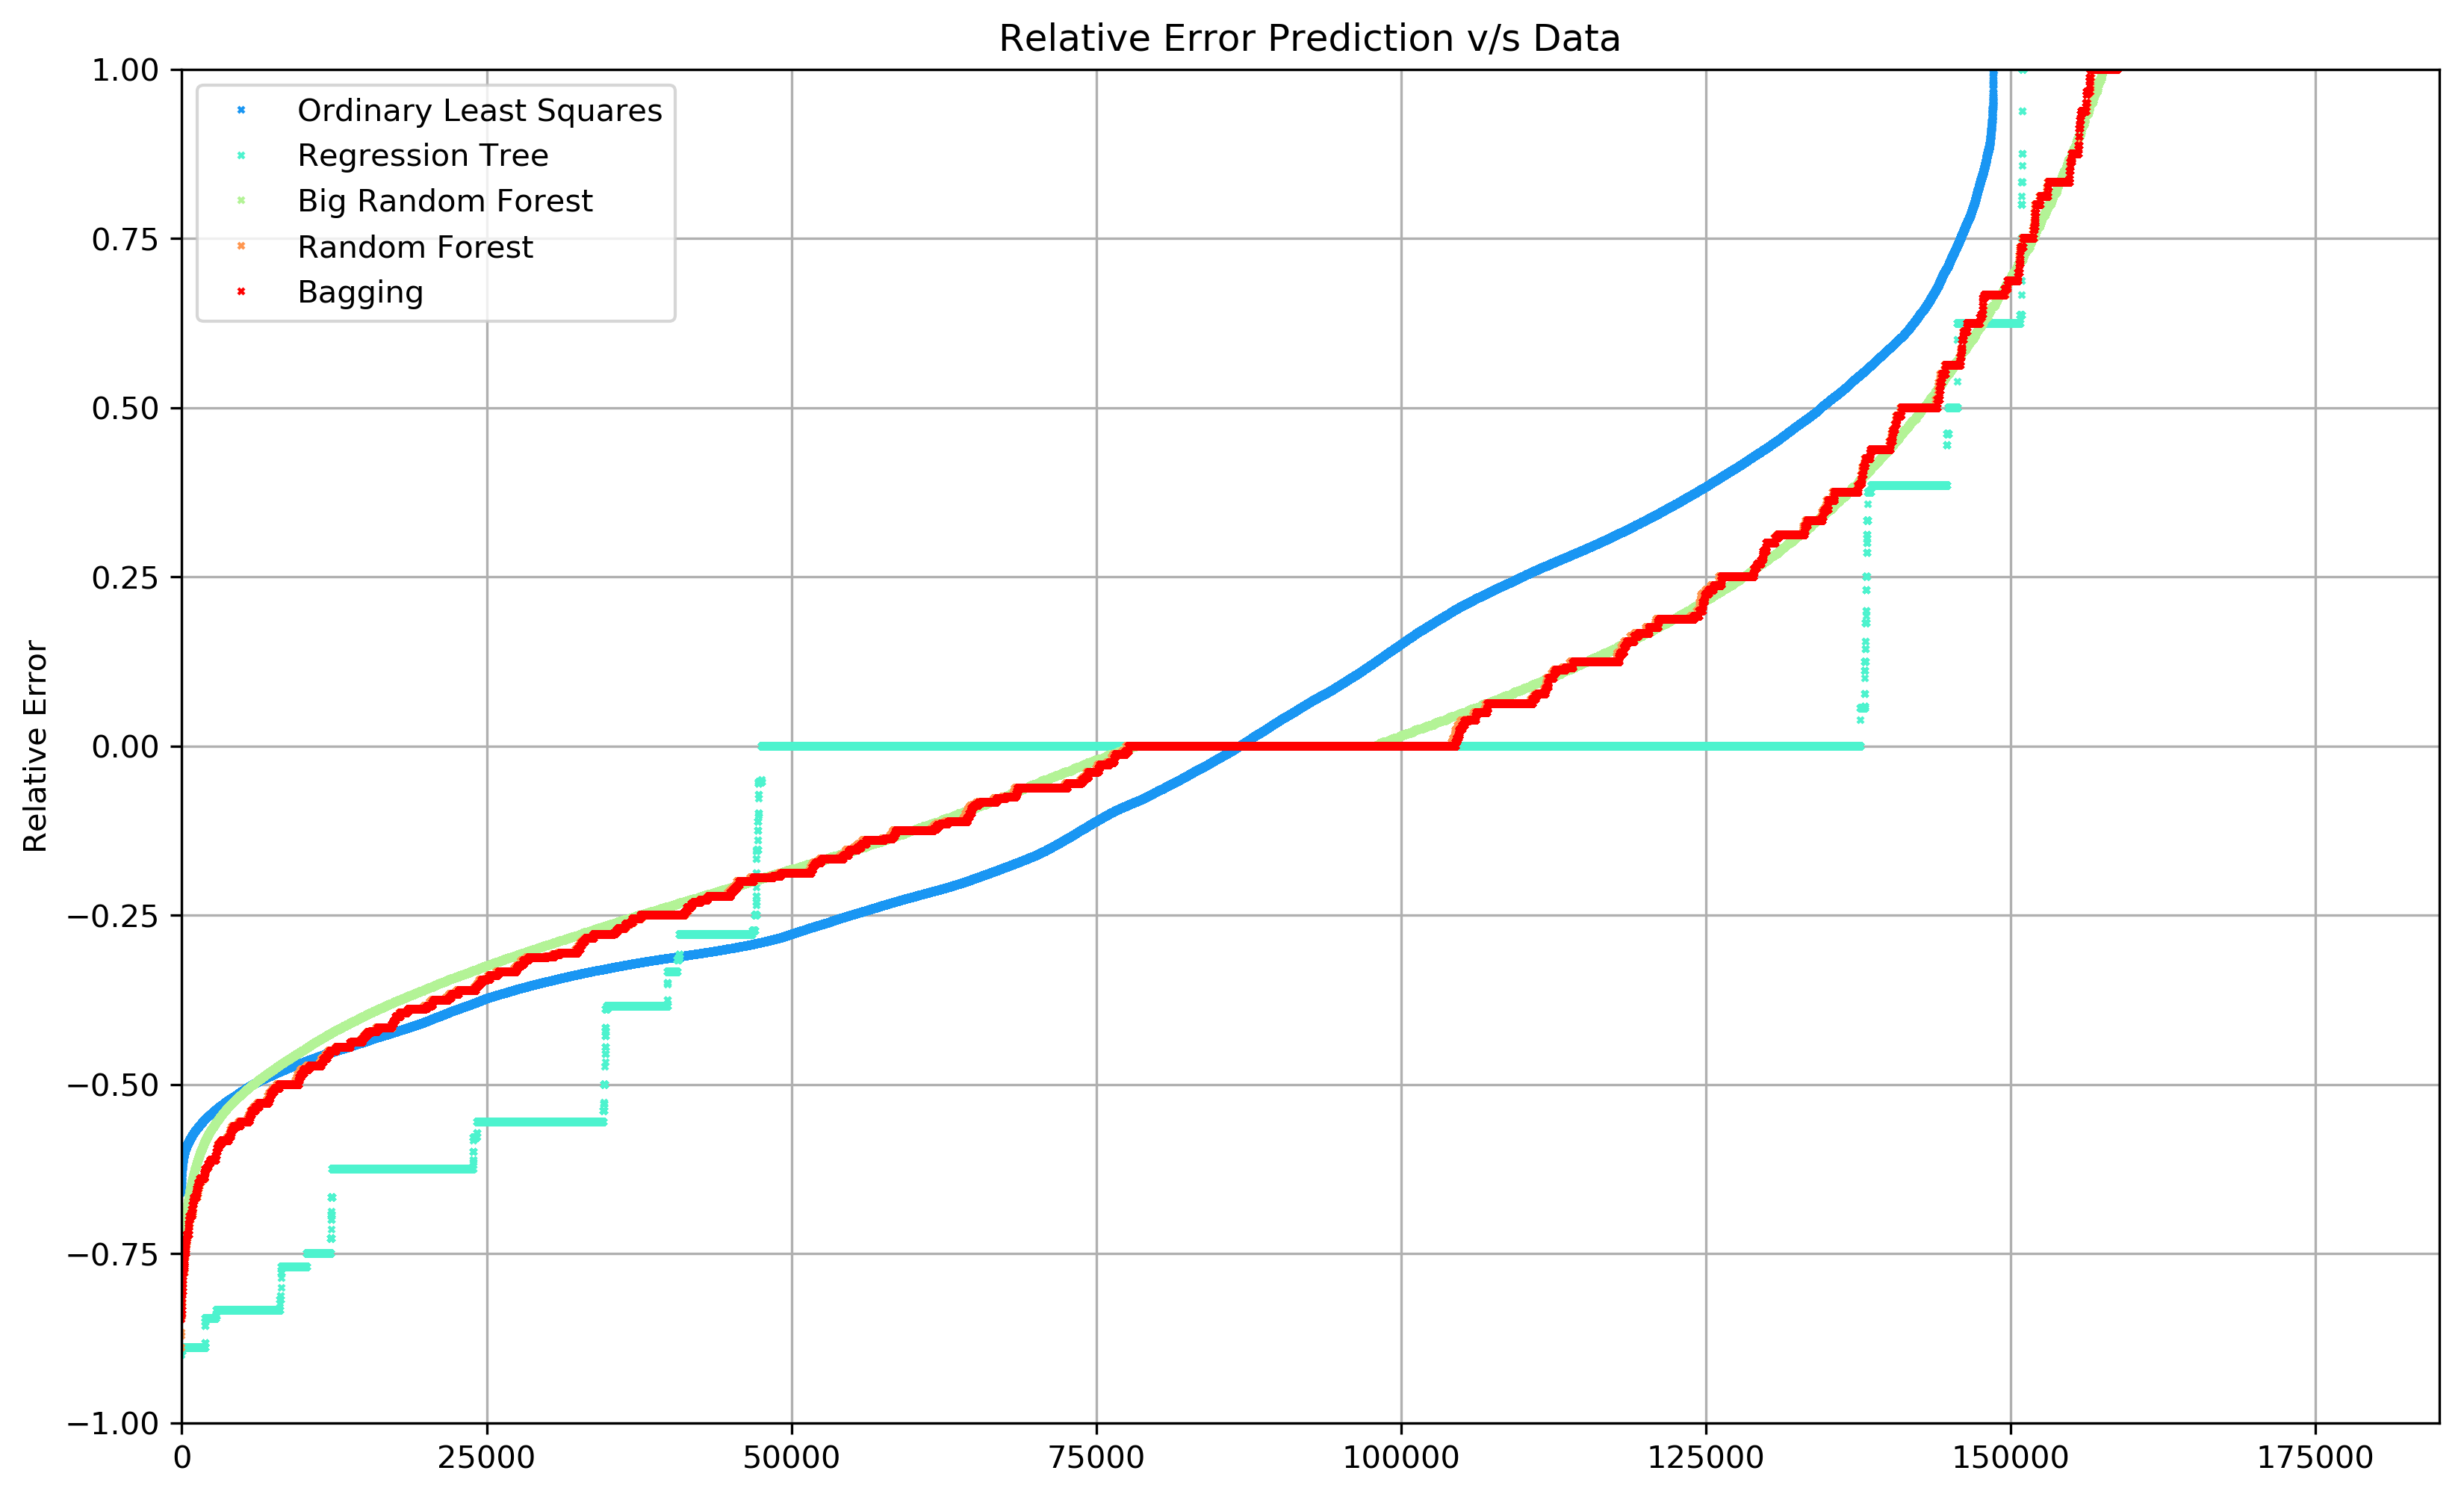

In [162]:
color=iter(cm.rainbow(np.linspace(0,1,len(experiments)+3)))
next(color)
plt.figure(figsize=(13,8),dpi=300)
for index, row in DataFrame(experiments).iterrows():
    relative_error = (row["Predictions"] - actuals) / (1 + abs(actuals))
    plt.plot(np.sort(relative_error),'x',c=next(color),
             markersize=2,label=row['Algorithm'])
plt.title('Relative Error Prediction v/s Data')
plt.ylabel('Relative Error')
plt.grid(True)
plt.legend()
plt.axis([0,len(actuals),-1,1])
plt.show()

In [163]:
experiments["Results"] = []
for o in experiments["Objects"]:
    experiments["Results"].append(
        model_selection.cross_val_score(o(), y=df2_2018['Victim Descent'], 
                                        X=df2_2018.drop("Victim Descent", axis=1),
                                        cv=5).mean())

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [164]:
DataFrame(experiments).drop(["Objects", "Predictions"], 
                            axis=1).set_index("Algorithm")

,Results
Algorithm,
Ordinary Least Squares,0.129475
Regression Tree,-0.166361
Big Random Forest,0.400683
Random Forest,0.349482
Bagging,0.348480


##### Victim Sex 

In [165]:
experiments = {"Algorithm":["Ordinary Least Squares", "Regression Tree", 
                            "Big Random Forest", "Random Forest", 
                            "Bagging"], 
               "Objects" : [lambda : LinearRegression(), 
                            lambda : DecisionTreeRegressor(), 
                            lambda : RandomForestRegressor(n_estimators=100), 
                            lambda : RandomForestRegressor(), 
                            lambda : BaggingRegressor()], 
               "Predictions":[[] for _ in range(5)]}
actuals = []

In [166]:
from sklearn.model_selection import train_test_split
[_.shape for _ in  train_test_split(df2_2018.drop("Victim Sex", axis=1), 
                                    df2_2018["Victim Sex"], test_size=0.25)]

[(138880, 8), (46294, 8), (138880,), (46294,)]

In [167]:
for _ in range (4):
    train_X, test_X, train_y, test_y = (
        train_test_split(df2_2018.drop("Victim Sex", axis=1), 
                         df2_2018["Victim Sex"], test_size=0.25))
    for i, obj_factory in enumerate(experiments["Objects"]):
        obj = obj_factory()
        obj.fit(y=train_y,X=train_X)
        experiments["Predictions"][i] += list(obj.predict(test_X))
    actuals += list(test_y)
actuals = pd.Series(actuals)
experiments["Predictions"] = list(map(pd.Series, experiments["Predictions"]))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


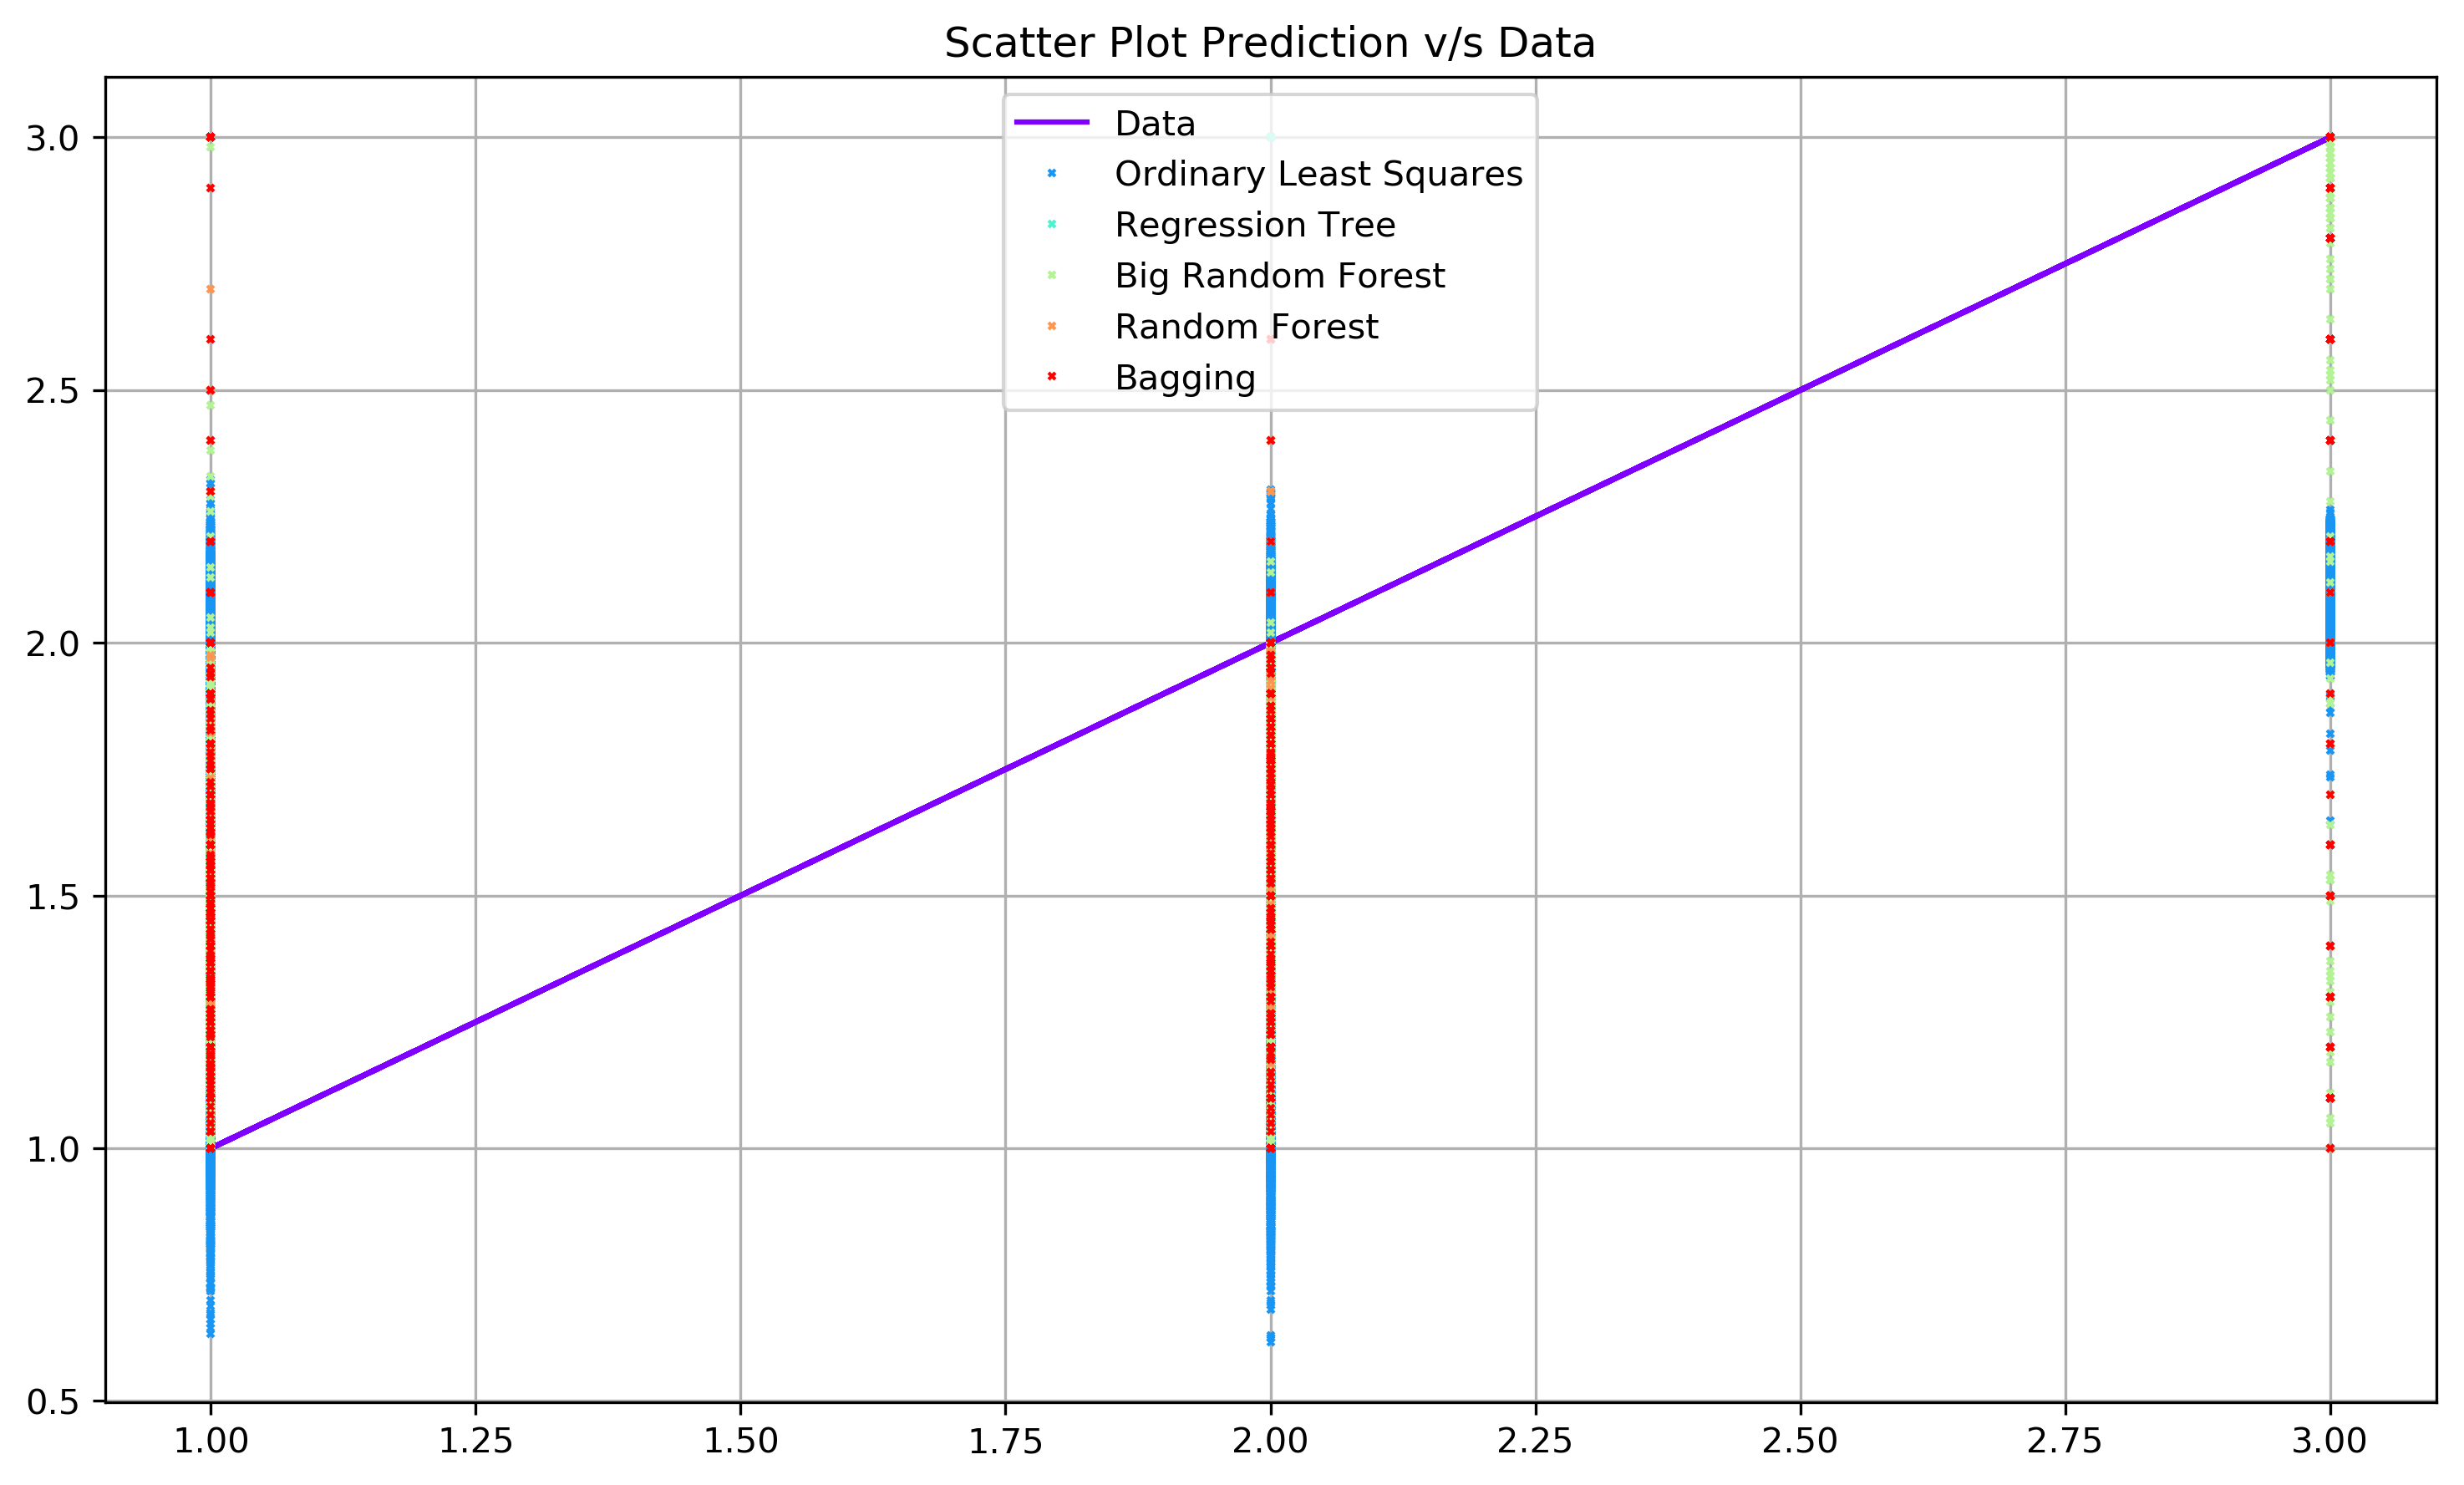

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
color=iter(cm.rainbow(np.linspace(0,1,len(experiments)+3)))
plt.figure(figsize=(12,7),dpi=300)
plt.plot(actuals,actuals,c=next(color),markersize=2,label='Data')
for _, row in DataFrame(experiments).iterrows():
    plt.plot(actuals, row["Predictions"],'x',c=next(color),
             markersize=2,label=row['Algorithm'])
plt.title('Scatter Plot Prediction v/s Data')
plt.grid(True)
plt.legend()
plt.show()

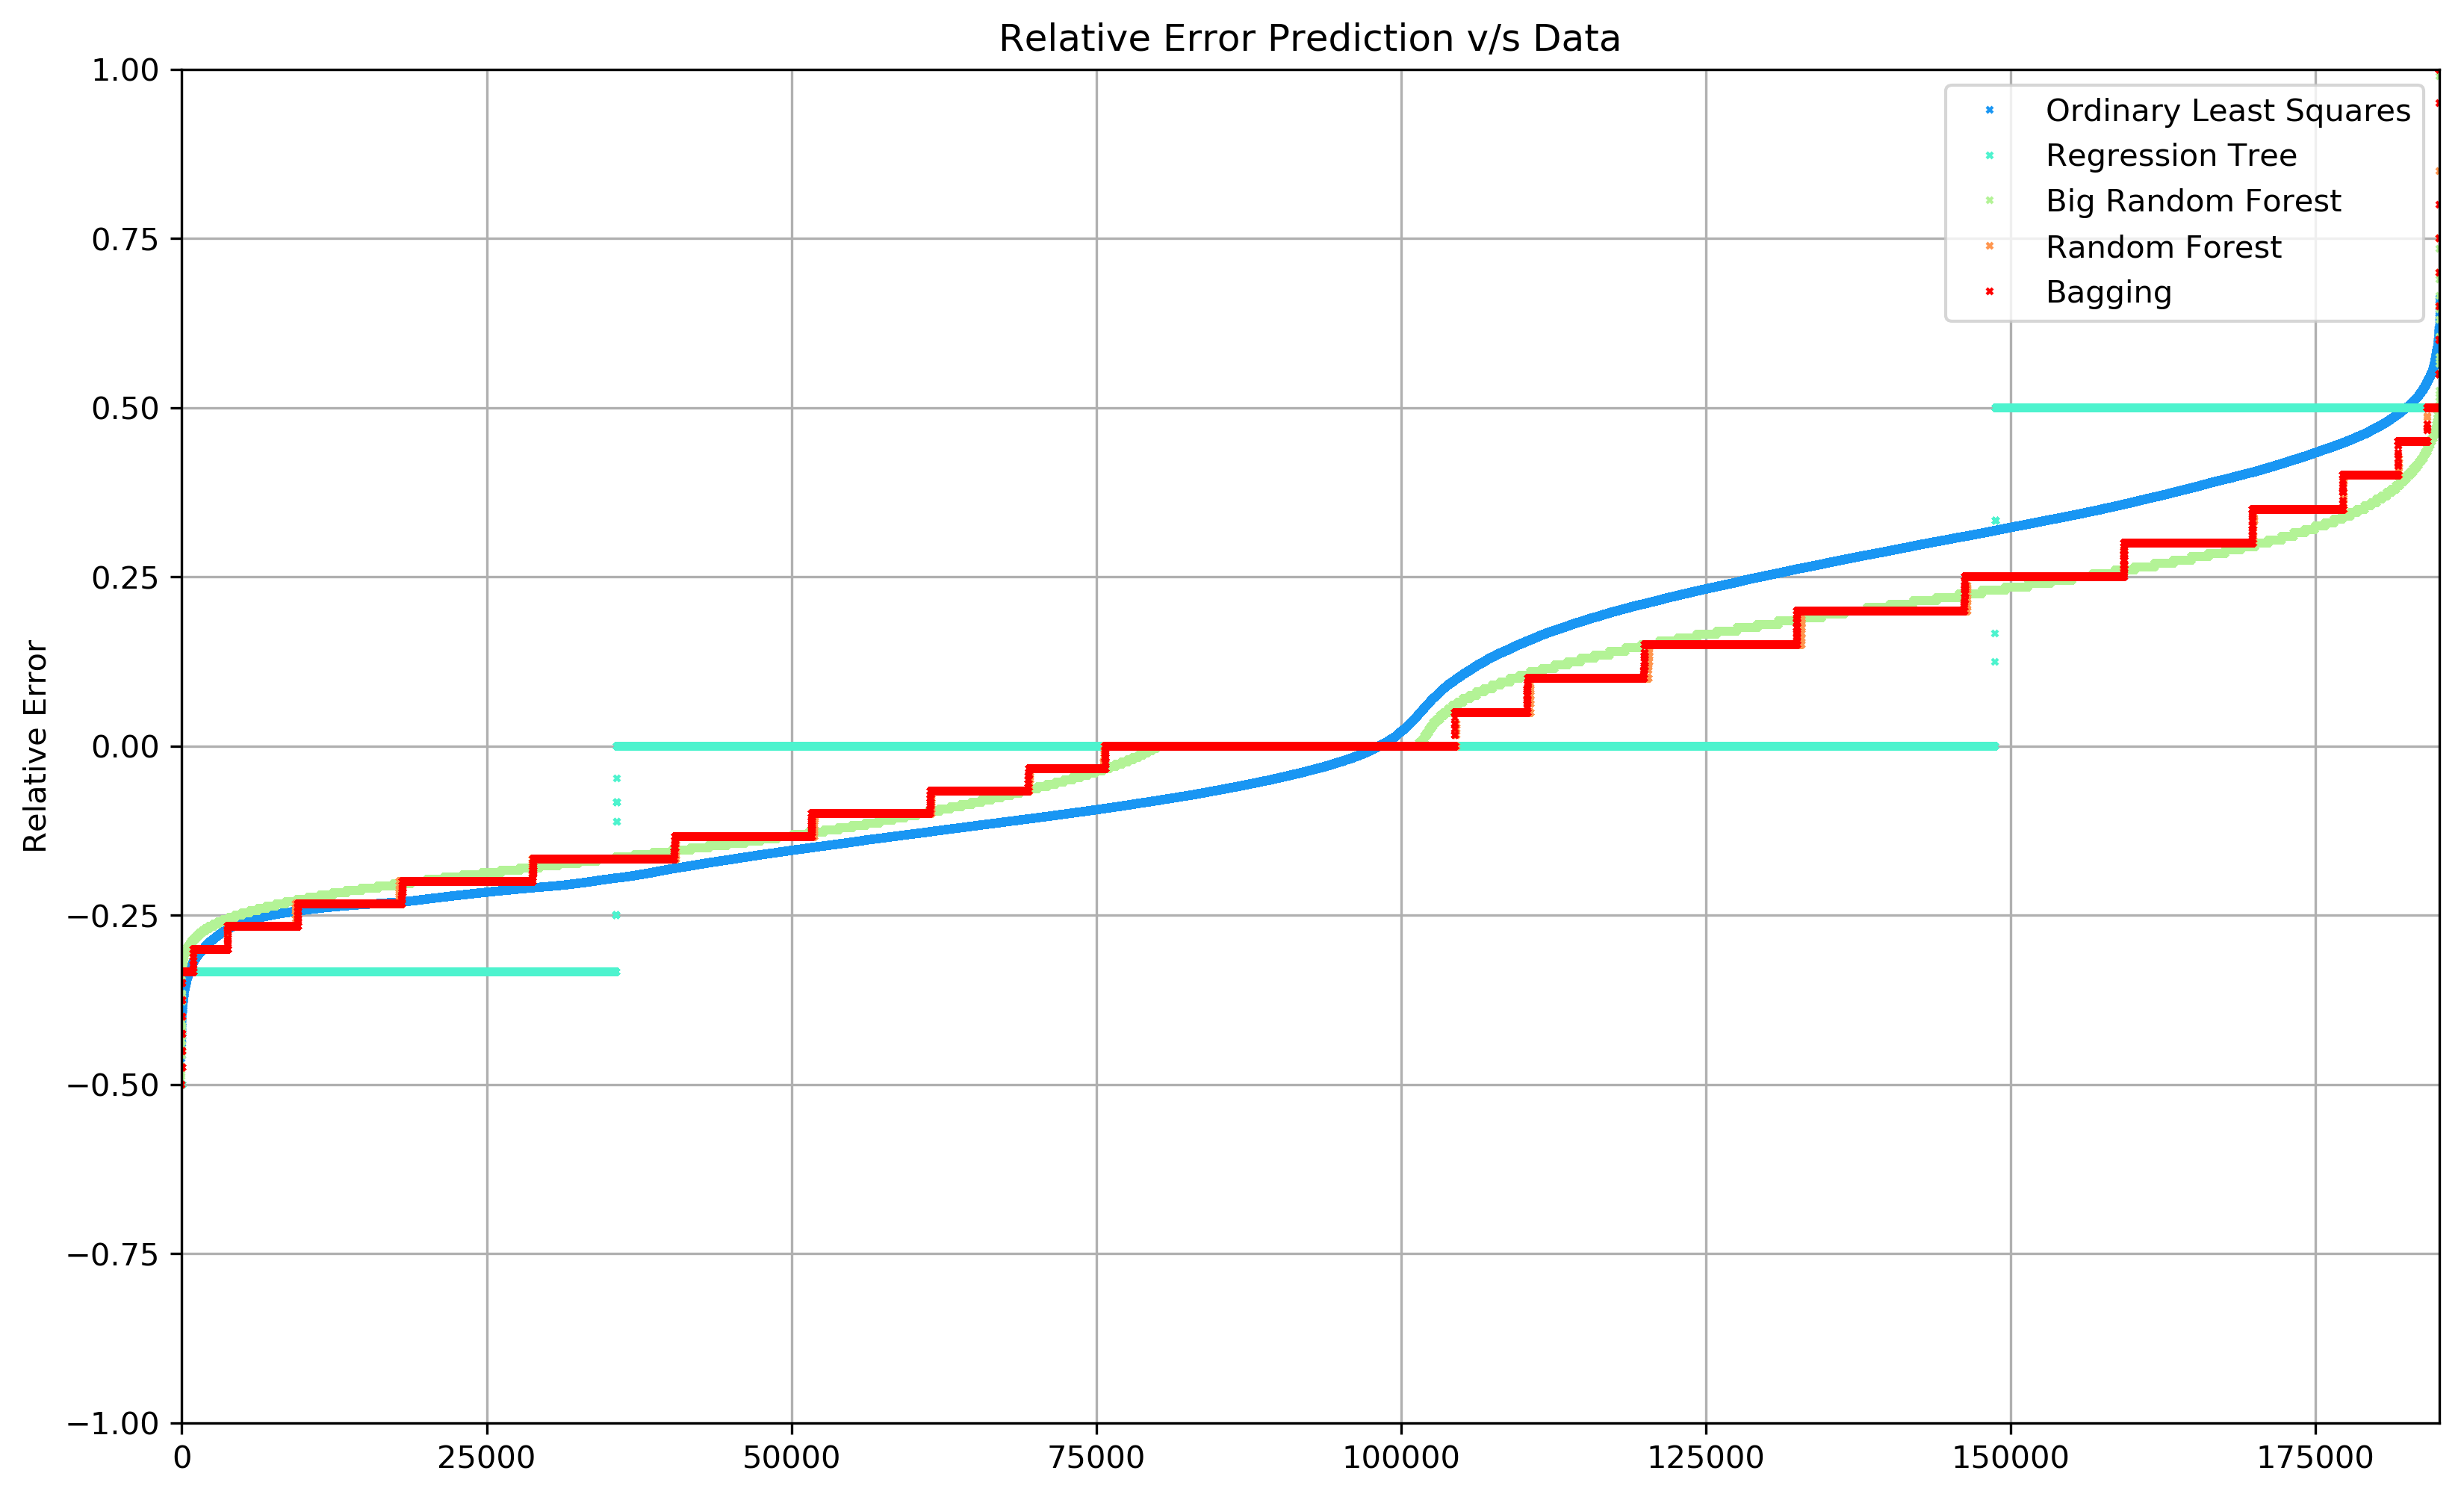

In [169]:
color=iter(cm.rainbow(np.linspace(0,1,len(experiments)+3)))
next(color)
plt.figure(figsize=(13,8),dpi=300)
for index, row in DataFrame(experiments).iterrows():
    relative_error = (row["Predictions"] - actuals) / (1 + abs(actuals))
    plt.plot(np.sort(relative_error),'x',c=next(color),
             markersize=2,label=row['Algorithm'])
plt.title('Relative Error Prediction v/s Data')
plt.ylabel('Relative Error')
plt.grid(True)
plt.legend()
plt.axis([0,len(actuals),-1,1])
plt.show()

In [170]:
experiments["Results"] = []
for o in experiments["Objects"]:
    experiments["Results"].append(
        model_selection.cross_val_score(o(), y=df2_2018['Victim Sex'], 
                                        X=df2_2018.drop("Victim Sex", axis=1),
                                        cv=5).mean())

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [171]:
DataFrame(experiments).drop(["Objects", "Predictions"], 
                            axis=1).set_index("Algorithm")

,Results
Algorithm,
Ordinary Least Squares,0.165854
Regression Tree,0.101488
Big Random Forest,0.524845
Random Forest,0.485086
Bagging,0.484589
